In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

# Load Data

In [2]:
df=pd.read_csv("relationship_comments_16.csv",sep=";",index_col=[0])

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (0,4,7,8) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


# General EDA

In [3]:
df.head()

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id
0,NaN,t5_2qjvn,antioch75,NaN,4,relationships,0,False,t3_5aevs2,You really need to get a run down of what actu...,NaN,0.0,False,d9g52zy,1.481098e+09,1.477958e+09,t3_5aevs2
1,NaN,t5_2qjvn,screelov,NaN,1,relationships,0,False,t3_5ack9c,"Get out of there, and don't look back. Don't s...",NaN,0.0,False,d9g532l,1.481098e+09,1.477958e+09,t3_5ack9c
2,NaN,t5_2qjvn,loves_small_motors,NaN,294,relationships,0,False,t3_5afv9z,"And honestly, it's pretty bizarre that someone...",NaN,0.0,False,d9g53m1,1.481098e+09,1.477958e+09,t1_d9g4b2o
3,NaN,t5_2qjvn,[deleted],NaN,-5,relationships,0,False,t3_5aejxb,[removed],NaN,0.0,False,d9g53o3,1.481098e+09,1.477958e+09,t1_d9g0ai7
4,NaN,t5_2qjvn,[deleted],NaN,1,relationships,0,False,t3_5afuv9,[removed],NaN,0.0,False,d9g53rk,1.481098e+09,1.477958e+09,t1_d9g518n


In [4]:
# Annahme: Dein DataFrame heißt df
anzahl_removed = df['body'].value_counts().get('[removed]', 0)

print(f"Anzahl der Zeilen mit '[removed]' in der Spalte 'body': {anzahl_removed}")


Anzahl der Zeilen mit '[removed]' in der Spalte 'body': 16071


In [66]:
df.tail()

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id
263888,NaN,t5_2qjvn,slinky999,NaN,16,relationships,0,False,t3_5ft3gn,I would also add that I was desperately unhapp...,NaN,0.0,False,damuewi,1.481892e+09,1.480550e+09,t1_damu47z
263889,NaN,t5_2qjvn,shelbyknits,NaN,1,relationships,0,False,t3_5ft6ew,"Given that she's been having loud, personal ca...",NaN,0.0,False,damueyo,1.481892e+09,1.480550e+09,t3_5ft6ew
263890,NaN,t5_2qjvn,theonewithoutapic,NaN,13,relationships,0,False,t3_5friad,"""Exercise gives you endorphins. Endorphins mak...",NaN,0.0,False,damuf0f,1.481892e+09,1.480550e+09,t1_damhkav
263891,NaN,t5_2qjvn,YouKnowYourCrazy,NaN,1,relationships,0,False,t3_5fsuzp,Context is everything. If you put this in the ...,NaN,0.0,False,damuff2,1.481892e+09,1.480550e+09,t1_damu86x
263892,NaN,t5_2qjvn,firingallcylinders,NaN,100,relationships,0,False,t3_5ft6ed,&gt;Well hello you big sexy man\n\nThat is not...,NaN,0.0,False,damuff6,1.481892e+09,1.480550e+09,t3_5ft6ed


In [67]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 263901 entries, 0 to 263892
Data columns (total 17 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   author_flair_css_class  0 non-null       float64
 1   subreddit_id            263901 non-null  object 
 2   author                  263901 non-null  object 
 3   author_flair_text       8 non-null       object 
 4   score                   263901 non-null  int64  
 5   subreddit               263901 non-null  object 
 6   controversiality        263901 non-null  object 
 7   stickied                263893 non-null  object 
 8   link_id                 263893 non-null  object 
 9   body                    263882 non-null  object 
 10  distinguished           5197 non-null    object 
 11  gilded                  263885 non-null  float64
 12  edited                  263885 non-null  object 
 13  id                      263885 non-null  object 
 14  retrieved_on            2

In [68]:
df.isnull().sum() 

author_flair_css_class    263901
subreddit_id                   0
author                         0
author_flair_text         263893
score                          0
subreddit                      0
controversiality               0
stickied                       8
link_id                        8
body                          19
distinguished             258704
gilded                        16
edited                        16
id                            16
retrieved_on                  16
created_utc                   16
parent_id                     16
dtype: int64

In [69]:
df.columns

Index(['author_flair_css_class', 'subreddit_id', 'author', 'author_flair_text',
       'score', 'subreddit', 'controversiality', 'stickied', 'link_id', 'body',
       'distinguished', 'gilded', 'edited', 'id', 'retrieved_on',
       'created_utc', 'parent_id'],
      dtype='object')

In [70]:
df.describe()

,author_flair_css_class,score,gilded,retrieved_on,created_utc
count,0.0,2.639010e+05,263885.000000,2.638850e+05,2.638850e+05
mean,NaN,4.492700e+04,0.000231,1.481494e+09,1.479231e+09
std,NaN,8.156764e+06,0.015202,2.282086e+05,7.642873e+05
min,NaN,-5.490000e+02,0.000000,1.481098e+09,1.477958e+09
25%,NaN,1.000000e+00,0.000000,1.481288e+09,1.478549e+09
50%,NaN,3.000000e+00,0.000000,1.481503e+09,1.479239e+09
75%,NaN,1.000000e+01,0.000000,1.481686e+09,1.479869e+09
max,NaN,1.481882e+09,1.000000,1.481892e+09,1.480550e+09


# One Feature EDA

# Controversiality

0             191537
0              65573
1               5063
1               1720
t3_5b6yqm          1
t3_5bqq2y          1
t3_5c59yg          1
t3_5cme26          1
t1_da1n2wv         1
t3_5dqfxc          1
t3_5dxzyu          1
t3_5fqyng          1
Name: controversiality, dtype: int64


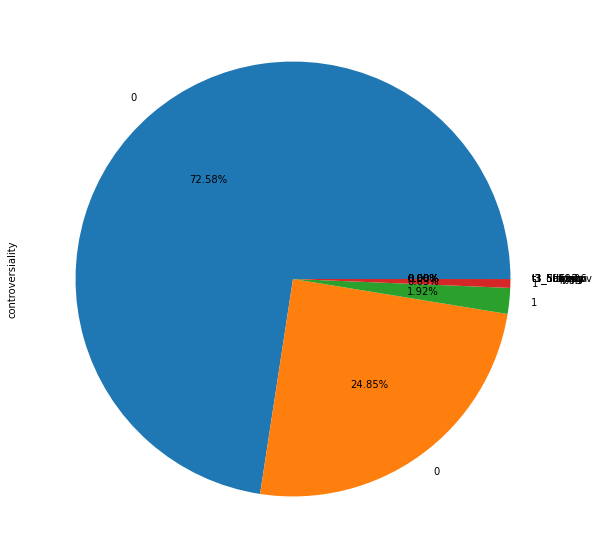

In [71]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [72]:
df[df['controversiality'].isna()]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id


# Converting controversiality values and deleting  unimportant rows

In [73]:
# Werte '0' in 0 umwandeln
df['controversiality'] = df['controversiality'].replace('0', 0)

# Werte '1' in 1 umwandeln
df['controversiality'] = df['controversiality'].replace('1', 1)

In [74]:
excluded_values = ['t3_5b6yqm', 't3_5bqq2y', 't3_5c59yg', 't3_5cme26', 't1_da1n2wv', 't3_5dqfxc', 't3_5dxzyu', 't3_5fqyng']

# Zeilen filtern und nur Zeilen behalten, die nicht in der Liste der auszuschließenden Werte sind
df= df[~df['controversiality'].isin(excluded_values)]


0    257110
1      6783
Name: controversiality, dtype: int64


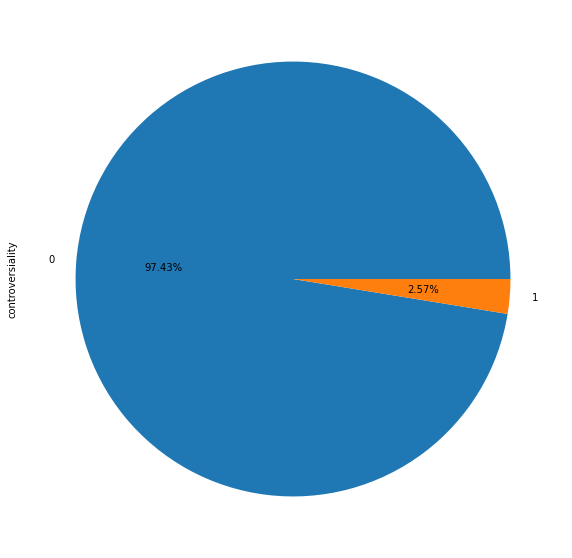

In [75]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["controversiality"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["controversiality"].value_counts())

In [76]:
df["controversiality"].unique()

array([0, 1], dtype=object)

# Stickied

False    263886
True          7
Name: stickied, dtype: int64


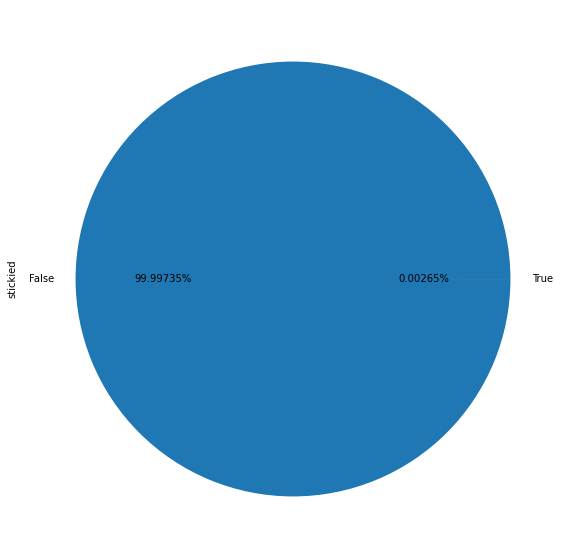

In [77]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())
#kann gelöscht werden

In [78]:
df["stickied"].unique()

array([False, True], dtype=object)

In [79]:
df[df['stickied'].isna()]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id


In [80]:
df['stickied'] = df['stickied'].replace(False, "0")
df['stickied'] = df['stickied'].replace(True, "1")

In [81]:
df["stickied"].unique()

array(['0', '1'], dtype=object)

0    263886
1         7
Name: stickied, dtype: int64


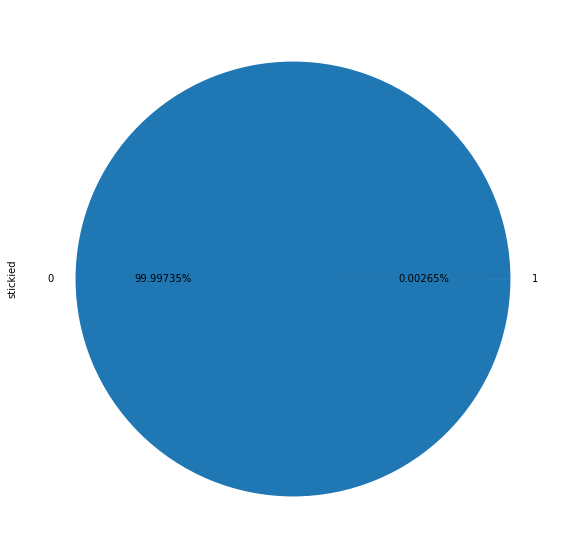

In [82]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.5f%%')
print(df["stickied"].value_counts())

# link_id  

t3_5ez4e0    689
t3_5df344    609
t3_5d2b49    604
t3_5an6ke    520
t3_5eacyk    499
            ... 
t3_5dzivr      1
t3_5dziee      1
t3_5bhjhf      1
t3_5bhkec      1
t3_5ft6ed      1
Name: link_id, Length: 18320, dtype: int64


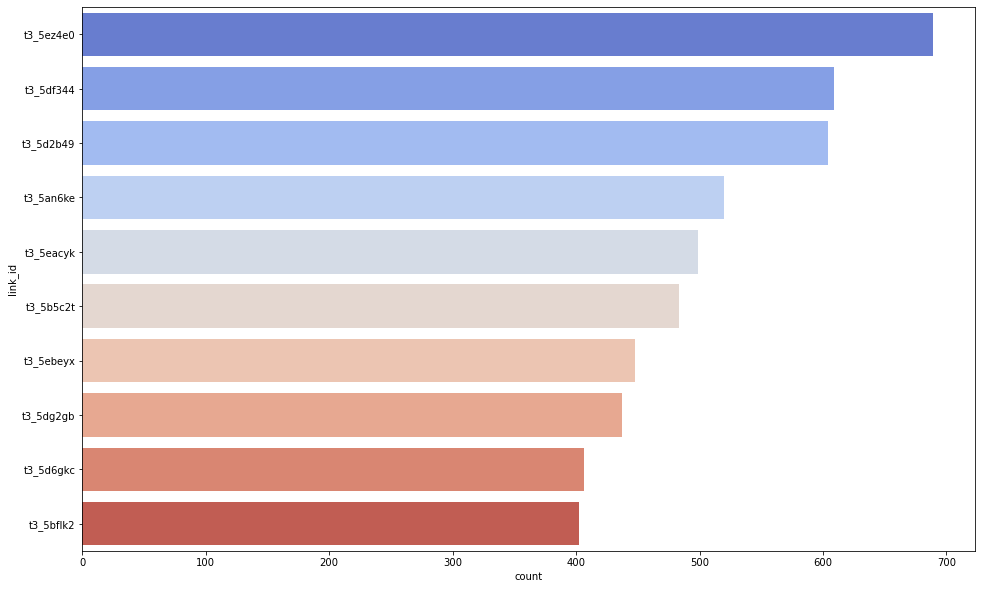

In [83]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:10].index)
print(df["link_id"].value_counts())

In [84]:
df[df['link_id'].isna()]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id


# Subreddit_id

t5_2qjvn    263893
Name: subreddit_id, dtype: int64


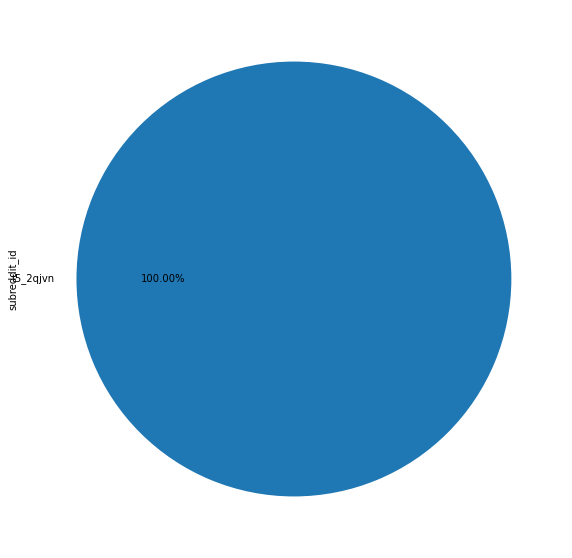

In [85]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit_id"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit_id"].value_counts()) 
#kann gelöscht werden

In [86]:
df[df['subreddit_id'].isna()]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id


# Author

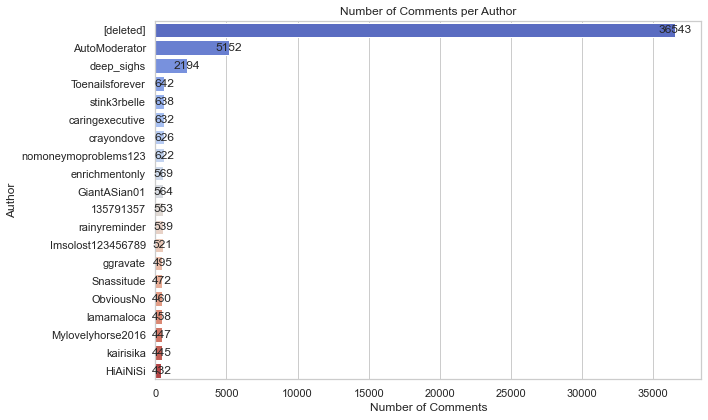

In [87]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
#automoderator löschen

In [88]:
 df[df['author'].str.contains('AutoModerator')]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id
14,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5afzoj,The above submission has been **temporarily re...,moderator,0.0,False,d9g56yj,1.481098e+09,1.477959e+09,t3_5afzoj
54,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ag0u4,The above submission has been **temporarily re...,moderator,0.0,False,d9g5gl8,1.481098e+09,1.477959e+09,t3_5ag0u4
166,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ag44q,The above submission has been **temporarily re...,moderator,0.0,False,d9g66vi,1.481098e+09,1.477960e+09,t3_5ag44q
206,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ag5fk,The above submission has been **temporarily re...,moderator,0.0,False,d9g6hxs,1.481098e+09,1.477960e+09,t3_5ag5fk
223,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ag63q,The above submission has been **temporarily re...,moderator,0.0,False,d9g6nuj,1.481099e+09,1.477961e+09,t3_5ag63q
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263761,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ft3xr,The above submission has been **temporarily re...,moderator,0.0,False,damtpy9,1.481891e+09,1.480549e+09,t3_5ft3xr
263764,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ft423,The above submission has been **temporarily re...,moderator,0.0,False,damtr1z,1.481891e+09,1.480550e+09,t3_5ft423
263780,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ft4ki,The above submission has been **temporarily re...,moderator,0.0,False,damtvhk,1.481891e+09,1.480550e+09,t3_5ft4ki
263815,NaN,t5_2qjvn,AutoModerator,NaN,1,relationships,0,0,t3_5ft5fm,The above submission has been **temporarily re...,moderator,0.0,False,damu33f,1.481892e+09,1.480550e+09,t3_5ft5fm


# Alle Automoderatoren löschen

In [89]:
df=df.drop(df[df['author'].str.contains('AutoModerator')].index)

In [90]:
 df[df['author'].str.contains('AutoModerator')]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id


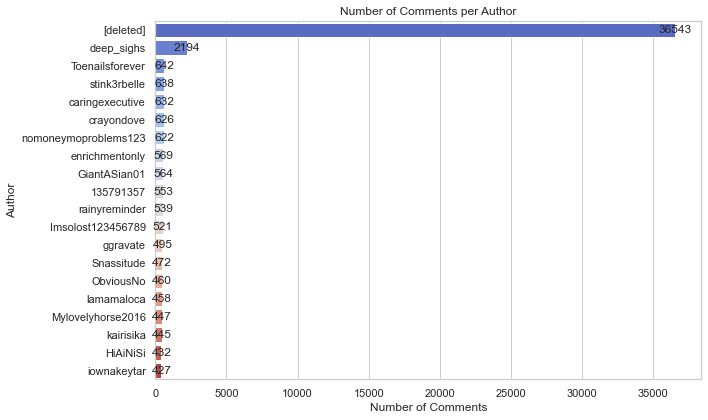

In [91]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits comments_new DataFrame mit einer "author" Spalte

# Top 5 Autoren nach Anzahl der Kommentare auswählen
top_authors = df['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen
top_comments = df[df['author'].isin(top_authors)]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha = 'center', va = 'center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()

# Author flair text

# NA mit 0 auffüllen

In [92]:
df['author_flair_text'].fillna('0', inplace=True)

0    258741
Name: author_flair_text, dtype: int64


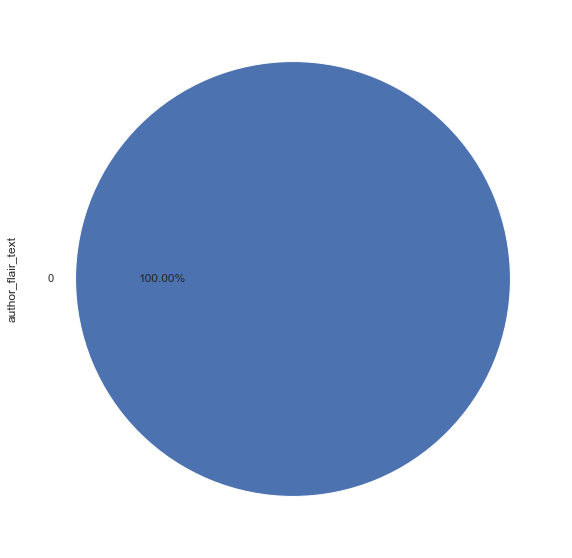

In [93]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["author_flair_text"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["author_flair_text"].value_counts()) 

# Subreddit

relationships    258741
Name: subreddit, dtype: int64


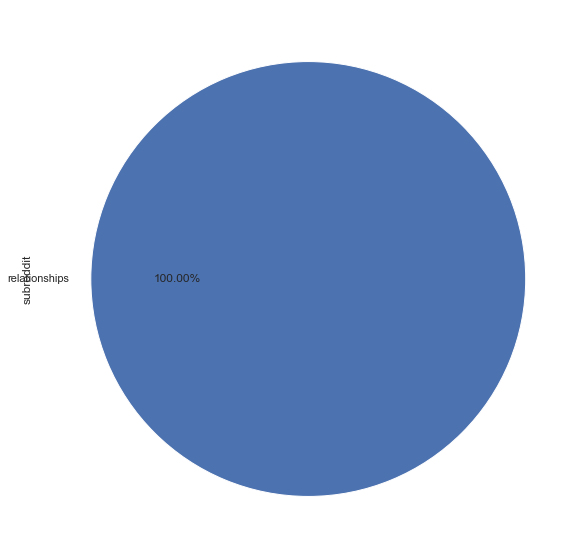

In [94]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["subreddit"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["subreddit"].value_counts())

In [95]:
df[df['subreddit'].isna()]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id


# Created_utc

In [96]:
# Unix-Epoch (1. Januar 1970) als pandas Timestamp
unix_epoch = pd.Timestamp('1970-01-01')

# Multiplikator für die Sekunden in Unix-Zeitstempel
seconds_multiplier = 1  # Hier könntest du 1000 verwenden, wenn die Zeitstempel in Millisekunden sind

# Die Zeitstempel in ein DateTime-Format konvertieren
df['created_utc'] = unix_epoch + df['created_utc'] * pd.to_timedelta(seconds_multiplier, unit='s')

# Hours

([<matplotlib.axis.XTick at 0x7fd85b873fd0>,
 [Text(0, 0, '0.0'),
  Text(1, 0, '1.0'),
  Text(2, 0, '2.0'),
  Text(3, 0, '3.0'),
  Text(4, 0, '4.0'),
  Text(5, 0, '5.0'),
  Text(6, 0, '6.0'),
  Text(7, 0, '7.0'),
  Text(8, 0, '8.0'),
  Text(9, 0, '9.0'),
  Text(10, 0, '10.0'),
  Text(11, 0, '11.0'),
  Text(12, 0, '12.0'),
  Text(13, 0, '13.0'),
  Text(14, 0, '14.0'),
  Text(15, 0, '15.0'),
  Text(16, 0, '16.0'),
  Text(17, 0, '17.0'),
  Text(18, 0, '18.0'),
  Text(19, 0, '19.0'),
  Text(20, 0, '20.0'),
  Text(21, 0, '21.0'),
  Text(22, 0, '22.0'),
  Text(23, 0, '23.0')])

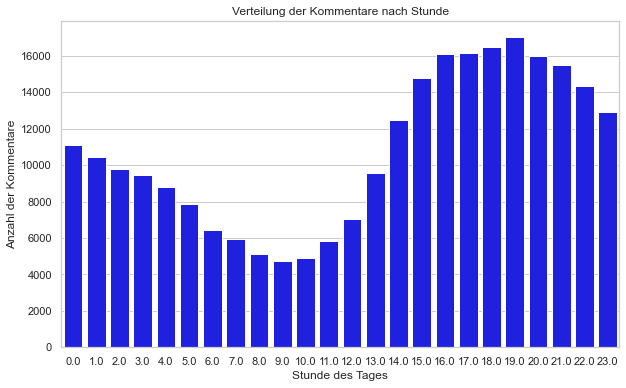

In [97]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Day

Text(0, 0.5, 'Anzahl der Kommentare')

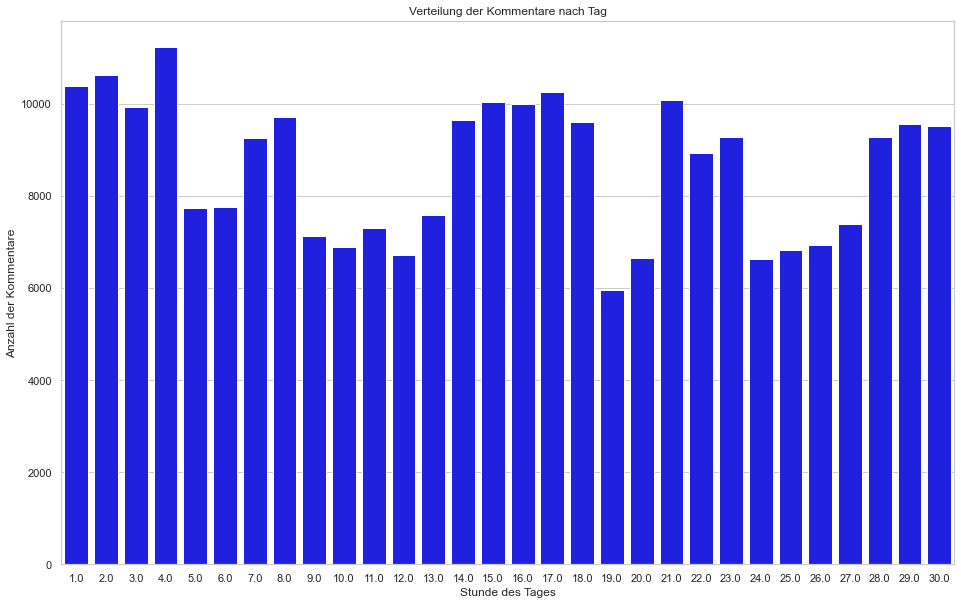

In [98]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
df['created_day'] = pd.to_datetime(df['created_utc'], unit='s').dt.day

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Year

In [99]:
df['created_year'] = pd.to_datetime(df['created_utc'], unit='s').dt.year

In [100]:
df['created_year'].unique()

array([2016.,   nan])

In [101]:
 df[pd.isna(df['created_year'])]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id,created_hour,created_day,created_year
42687,NaN,t5_2qjvn,enfant-terrible,0,3,relationships,0,0,t3_5b6yqm,Have you talked to him about these things? It ...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
69401,NaN,t5_2qjvn,pbblankgirl,0,2,relationships,0,0,t3_5bqq2y,Tbh I'm surprised you are allowed to label her...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
86063,NaN,t5_2qjvn,pbblankgirl,0,2,relationships,0,0,t3_5c59yg,I've been diagnosed with Bipolar I axis 1 sinc...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
107041,NaN,t5_2qjvn,spermyporters,0,3,relationships,0,0,t3_5cme26,Her death is **not** your fault. I cannot stre...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
139809,NaN,t5_2qjvn,iminlovewithacoco,0,4,relationships,0,0,t3_5d3sfi,"Wow, your wife needs you and you are failing h...",NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
166510,NaN,t5_2qjvn,pbblankgirl,0,2,relationships,0,0,t3_5dqfxc,If you want to be included in her sorority lif...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
177141,NaN,t5_2qjvn,white_ran_2000,0,1,relationships,0,0,t3_5dxzyu,I think it's an issue of planning here. Normal...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN
259999,NaN,t5_2qjvn,pbblankgirl,0,15,relationships,0,0,t3_5fqyng,I hope you know that you're on your way to bei...,NaN,NaN,NaN,NaN,NaN,NaT,NaN,NaN,NaN,NaN


# Delet all rows that have a NA in created_utc

In [102]:
df = df.dropna(subset=['created_year'])

In [103]:
 df[pd.isna(df['created_year'])]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id,created_hour,created_day,created_year


# Gilded

0.0    258672
1.0        61
Name: gilded, dtype: int64


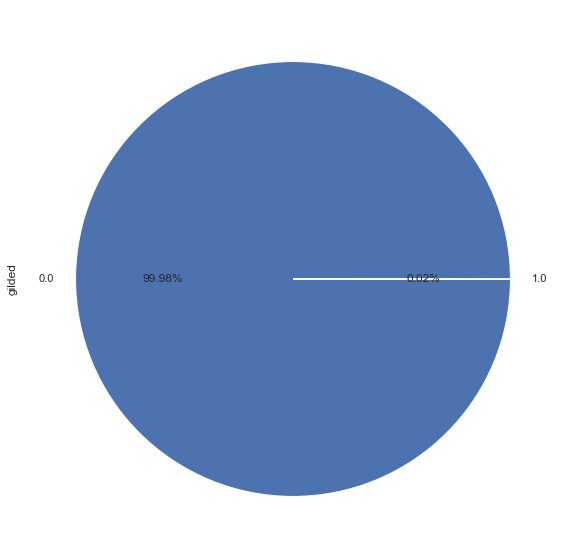

In [104]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [105]:
df['gilded'] = df['gilded'].replace(0,"0")

In [106]:
df['gilded'] = df['gilded'].replace(1,"1")

0    258672
1        61
Name: gilded, dtype: int64


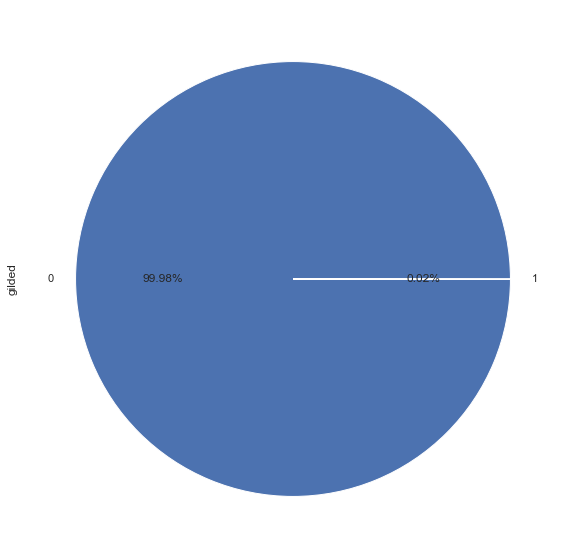

In [107]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

In [108]:
df["gilded"].unique()

array(['0', '1'], dtype=object)

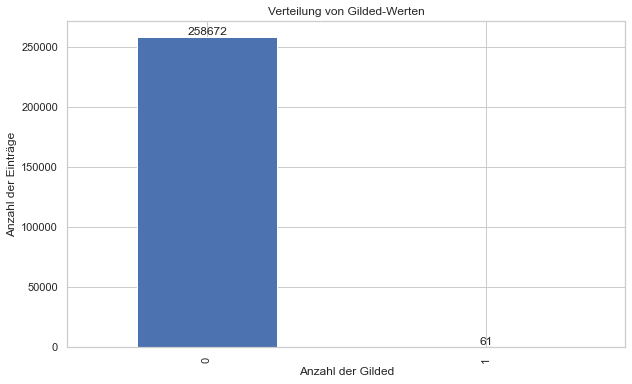

In [109]:
fig = plt.figure(figsize=(10, 6))
ax = df["gilded"].value_counts().plot(kind='bar')

# Optional: Beschriftungen und Titel hinzufügen
ax.set_xlabel('Anzahl der Gilded')
ax.set_ylabel('Anzahl der Einträge')
ax.set_title('Verteilung von Gilded-Werten')

# Anzahl der Werte über den Balken anzeigen
for i, v in enumerate(df["gilded"].value_counts()):
    ax.text(i, v, str(v), ha='center', va='bottom')

# Distinguished

moderator    49
Name: distinguished, dtype: int64


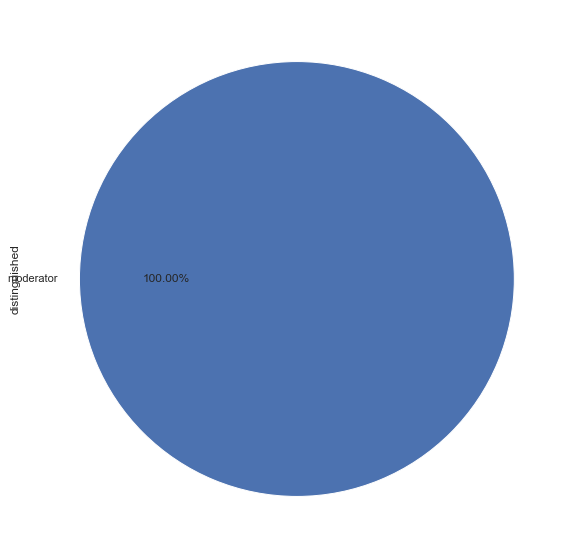

In [110]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["distinguished"].value_counts())

In [111]:
df['distinguished'].fillna('0', inplace=True)

0            258684
moderator        49
Name: distinguished, dtype: int64


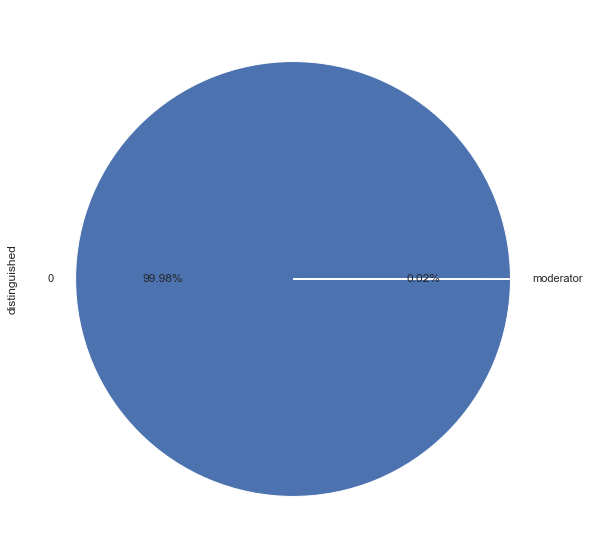

In [112]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["distinguished"].value_counts())

In [113]:
df[df['distinguished'] == 'moderator']

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id,created_hour,created_day,created_year
86299,NaN,t5_2qjvn,Sommiel,0,51,relationships,0,0,t3_5c5nd0,This is low effort/high reward trolling... to ...,moderator,0,False,d9tu6t9,1.481358e+09,2016-11-10 03:23:16,t1_d9tu0k9,3.0,10.0,2016.0
87063,NaN,t5_2qjvn,Sommiel,0,79,relationships,0,0,t3_5c5nd0,Not *all* of reddit. Just *most* of reddit.,moderator,0,False,d9u24s6,1.481362e+09,2016-11-10 07:27:07,t1_d9u23bz,7.0,10.0,2016.0
87177,NaN,t5_2qjvn,Sommiel,0,12,relationships,0,0,t3_5c5nd0,"If you didn't get a reply, it was a sad oversi...",moderator,0,False,d9u39o7,1.481363e+09,2016-11-10 08:17:37,t1_d9u3094,8.0,10.0,2016.0
87216,NaN,t5_2qjvn,aaronth07,0,7,relationships,1,0,t3_5c5nd0,Talk about it anywhere on reddit that allows i...,moderator,0,False,d9u3pfn,1.481363e+09,2016-11-10 08:38:37,t1_d9u3gj7,8.0,10.0,2016.0
88326,NaN,t5_2qjvn,MysticJAC,0,6,relationships,0,0,t3_5c5nd0,It should be fixed now.,moderator,0,False,d9ucsl1,1.481368e+09,2016-11-10 14:49:31,t1_d9u3094,14.0,10.0,2016.0
88904,NaN,t5_2qjvn,ofthrees,0,26,relationships,0,0,t3_5c5nd0,"Yeah, that would still violate the no politics...",moderator,0,False,d9ug9k7,1.481370e+09,2016-11-10 16:04:47,t1_d9u93r2,16.0,10.0,2016.0
88957,NaN,t5_2qjvn,ofthrees,0,34,relationships,0,0,t3_5c5nd0,"We understand, but trust us: mention politics...",moderator,0,False,d9uglmu,1.481370e+09,2016-11-10 16:11:30,t1_d9u9t9w,16.0,10.0,2016.0
91208,NaN,t5_2qjvn,Sommiel,0,9,relationships,0,0,t3_5c5nd0,"Aww, so you were *trolling us?* \n\nAnd here I...",moderator,0,False,d9uwh6f,1.481378e+09,2016-11-10 21:18:45,t1_d9uar18,21.0,10.0,2016.0
91235,NaN,t5_2qjvn,Sommiel,0,3,relationships,0,0,t3_5c5nd0,"Jac, you are the bomb.",moderator,0,False,d9uwnfp,1.481378e+09,2016-11-10 21:22:12,t1_d9ucsl1,21.0,10.0,2016.0
91270,NaN,t5_2qjvn,Sommiel,0,21,relationships,0,0,t3_5c5nd0,"Actually, you are free to make another post wi...",moderator,0,False,d9uws1i,1.481378e+09,2016-11-10 21:24:41,t1_d9ufhr2,21.0,10.0,2016.0


In [114]:
import re
indices_to_remove =[19,35,37,38,39,41,42,43,45,46] 
report_bot=df[df['distinguished'].str.contains('moderator')]
# Abrufen der Indexwerte der Zeilen in bot_in_body_rows, die gelöscht werden sollen
indices_to_delete = report_bot.iloc[indices_to_remove].index
df.drop(indices_to_delete, inplace=True)

In [115]:
len(df[df['distinguished'] == 'moderator'])

39

# Edited

In [116]:
df["edited"].unique()

array(['False', '1477959448', '1477959824', ..., '1480565616',
       '1480550311', '1480550914'], dtype=object)

In [117]:
# Alle Zahlenwerte in der Spalte "edited" durch "1" ersetzen
df['edited'] = df['edited'].replace(to_replace=r'\d', value='1', regex=True)
df['edited'] = df['edited'].replace('1111111111', "1")
df['edited'] = df['edited'].replace('False', "0")


In [118]:
df["edited"].unique()

array(['0', '1'], dtype=object)

0    248389
1     10334
Name: edited, dtype: int64


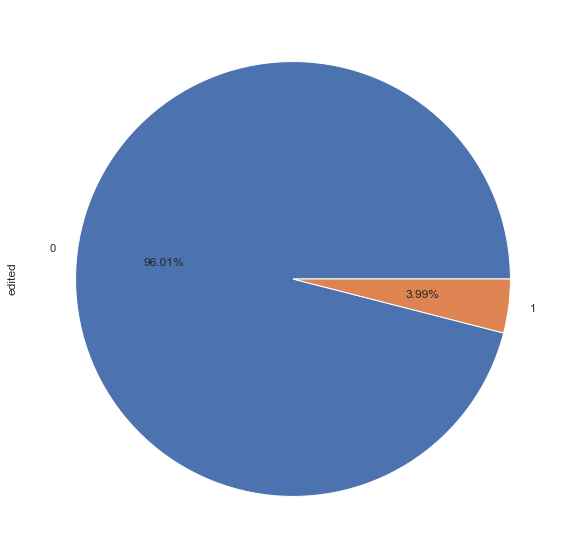

In [119]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df['edited'].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df['edited'].value_counts())

In [120]:
df[df['edited'].isna()]

,author_flair_css_class,subreddit_id,author,author_flair_text,score,subreddit,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,retrieved_on,created_utc,parent_id,created_hour,created_day,created_year


# Score

In [121]:
df['score'] = df["score"].astype(int)

In [122]:
df["score"].value_counts()

1       68917
2       33850
3       22236
4       10179
5       10160
        ...  
1055        1
1270        1
681         1
1101        1
1306        1
Name: score, Length: 1262, dtype: int64

In [123]:
df["score"].mean()

16.78190960989166

In [124]:
df.describe()

,author_flair_css_class,score,retrieved_on,created_hour,created_day,created_year
count,0.0,258723.000000,2.587230e+05,258723.000000,258723.000000,258723.0
mean,NaN,16.781910,1.481494e+09,13.237652,15.141731,2016.0
std,NaN,72.977834,2.281754e+05,7.154374,8.841270,0.0
min,NaN,-549.000000,1.481098e+09,0.000000,1.000000,2016.0
25%,NaN,1.000000,1.481287e+09,7.000000,7.000000,2016.0
50%,NaN,3.000000,1.481502e+09,15.000000,15.000000,2016.0
75%,NaN,10.000000,1.481686e+09,19.000000,23.000000,2016.0
max,NaN,4480.000000,1.481892e+09,23.000000,30.000000,2016.0


In [125]:
df.isnull().sum() 

author_flair_css_class    258723
subreddit_id                   0
author                         0
author_flair_text              0
score                          0
subreddit                      0
controversiality               0
stickied                       0
link_id                        0
body                          11
distinguished                  0
gilded                         0
edited                         0
id                             0
retrieved_on                   0
created_utc                    0
parent_id                      0
created_hour                   0
created_day                    0
created_year                   0
dtype: int64

In [126]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258723 entries, 0 to 263892
Data columns (total 20 columns):
 #   Column                  Non-Null Count   Dtype         
---  ------                  --------------   -----         
 0   author_flair_css_class  0 non-null       float64       
 1   subreddit_id            258723 non-null  object        
 2   author                  258723 non-null  object        
 3   author_flair_text       258723 non-null  object        
 4   score                   258723 non-null  int64         
 5   subreddit               258723 non-null  object        
 6   controversiality        258723 non-null  object        
 7   stickied                258723 non-null  object        
 8   link_id                 258723 non-null  object        
 9   body                    258712 non-null  object        
 10  distinguished           258723 non-null  object        
 11  gilded                  258723 non-null  object        
 12  edited                  258723 non-

# Two Features Analyses

# Hours vs score

<AxesSubplot:xlabel='created_hour', ylabel='score'>

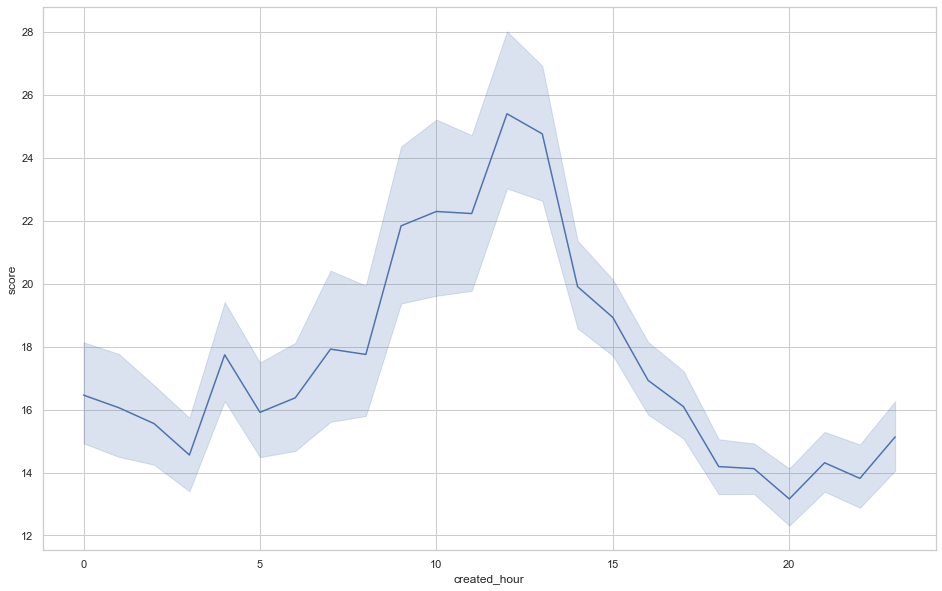

In [127]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs score

<AxesSubplot:xlabel='created_day', ylabel='score'>

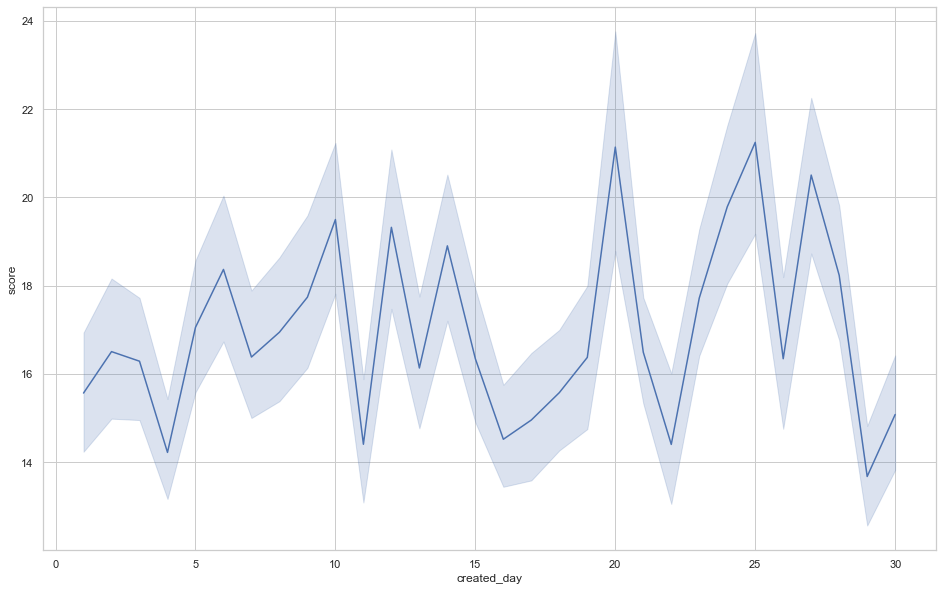

In [128]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which author have the most scores

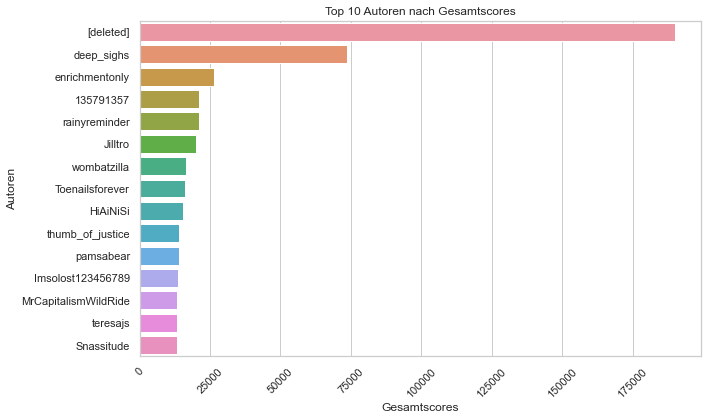

In [129]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren und die Top 10 auswählen
top_authors = author_scores.sort_values(ascending=False).head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 10 Autoren nach Gesamtscores')
plt.xlabel('Gesamtscores')
plt.ylabel('Autoren')
plt.xticks(rotation=45)
plt.tight_layout()


# Ohne deleted

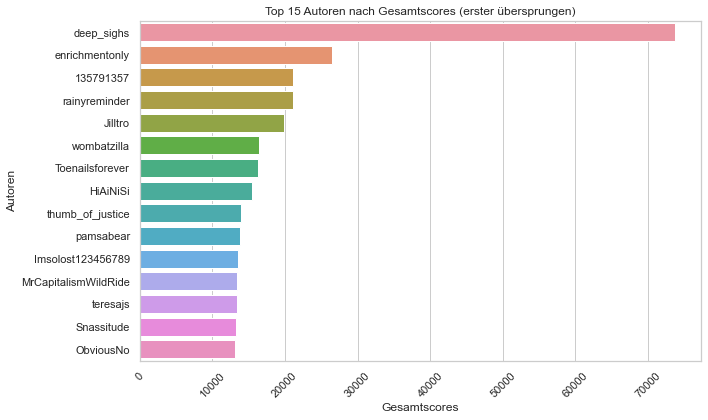

In [130]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[1:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel('Gesamtscores')
plt.ylabel('Autoren')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# Column removing


In [131]:
df=df.drop(["author_flair_css_class", "subreddit","retrieved_on","subreddit_id"], axis = 1)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258723 entries, 0 to 263892
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             258723 non-null  object        
 1   author_flair_text  258723 non-null  object        
 2   score              258723 non-null  int64         
 3   controversiality   258723 non-null  object        
 4   stickied           258723 non-null  object        
 5   link_id            258723 non-null  object        
 6   body               258712 non-null  object        
 7   distinguished      258723 non-null  object        
 8   gilded             258723 non-null  object        
 9   edited             258723 non-null  object        
 10  id                 258723 non-null  object        
 11  created_utc        258723 non-null  datetime64[ns]
 12  parent_id          258723 non-null  object        
 13  created_hour       258723 non-null  float64      

In [133]:
df.isnull().sum() 

author                0
author_flair_text     0
score                 0
controversiality      0
stickied              0
link_id               0
body                 11
distinguished         0
gilded                0
edited                0
id                    0
created_utc           0
parent_id             0
created_hour          0
created_day           0
created_year          0
dtype: int64

# Row deleting

# Delete all Comments that have have a NA

In [134]:
df[pd.isna(df['body'])]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
97789,notevenhairy,0,2,0,0,t3_5cflmr,NaN,0,0,1,d9w5y73,2016-11-11 18:42:02,t1_d9w5tjg,18.0,11.0,2016.0
97981,notevenhairy,0,1,0,0,t3_5cflmr,NaN,0,0,1,d9w78yq,2016-11-11 19:09:41,t1_d9w6izf,19.0,11.0,2016.0
235660,livingtogetherq,0,7,1,0,t3_5f90ki,NaN,0,0,1,daieruh,2016-11-28 02:04:46,t1_daienoe,2.0,28.0,2016.0
235695,livingtogetherq,0,8,0,0,t3_5f90ki,NaN,0,0,1,daif0l9,2016-11-28 02:10:32,t1_daieuxo,2.0,28.0,2016.0
235724,livingtogetherq,0,1,1,0,t3_5f90ki,NaN,0,0,1,daifa7u,2016-11-28 02:16:59,t1_daiezaf,2.0,28.0,2016.0
235739,livingtogetherq,0,3,0,0,t3_5f90ki,NaN,0,0,1,daiffko,2016-11-28 02:20:32,t1_daif8of,2.0,28.0,2016.0
235763,livingtogetherq,0,-21,0,0,t3_5f90ki,NaN,0,0,1,daifnci,2016-11-28 02:25:32,t1_daif3rt,2.0,28.0,2016.0
235769,livingtogetherq,0,-17,0,0,t3_5f90ki,NaN,0,0,1,daifpyj,2016-11-28 02:27:15,t1_daifijn,2.0,28.0,2016.0
235802,livingtogetherq,0,5,0,0,t3_5f90ki,NaN,0,0,1,daifw30,2016-11-28 02:31:21,t1_daifrnm,2.0,28.0,2016.0
235845,livingtogetherq,0,-23,0,0,t3_5f90ki,NaN,0,0,1,daig7lr,2016-11-28 02:38:21,t1_daig2m3,2.0,28.0,2016.0


In [135]:
df = df.dropna(subset=['body'])

In [136]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 258712 entries, 0 to 263892
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             258712 non-null  object        
 1   author_flair_text  258712 non-null  object        
 2   score              258712 non-null  int64         
 3   controversiality   258712 non-null  object        
 4   stickied           258712 non-null  object        
 5   link_id            258712 non-null  object        
 6   body               258712 non-null  object        
 7   distinguished      258712 non-null  object        
 8   gilded             258712 non-null  object        
 9   edited             258712 non-null  object        
 10  id                 258712 non-null  object        
 11  created_utc        258712 non-null  datetime64[ns]
 12  parent_id          258712 non-null  object        
 13  created_hour       258712 non-null  float64      

In [137]:
df.isnull().sum() 

author               0
author_flair_text    0
score                0
controversiality     0
stickied             0
link_id              0
body                 0
distinguished        0
gilded               0
edited               0
id                   0
created_utc          0
parent_id            0
created_hour         0
created_day          0
created_year         0
dtype: int64

# Body analyses and Pre processing

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

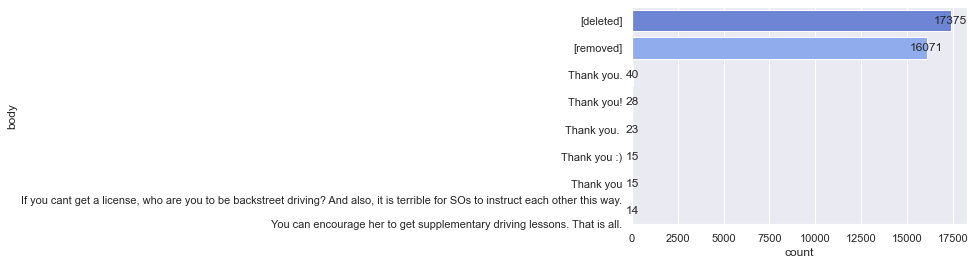

In [138]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben removed comments mehr likes

In [139]:
filtered_df=df[df['body'] == '[removed]']

In [140]:
filtered_df.describe()

,score,created_hour,created_day,created_year
count,16071.000000,16071.000000,16071.000000,16071.0
mean,3.192272,12.959679,15.729077,2016.0
std,33.465254,7.096446,8.952444,0.0
min,-276.000000,0.000000,1.000000,2016.0
25%,1.000000,7.000000,8.000000,2016.0
50%,1.000000,15.000000,16.000000,2016.0
75%,1.000000,19.000000,24.000000,2016.0
max,1886.000000,23.000000,30.000000,2016.0


Text(0.5, 1.0, 'Histogramm der Scores')

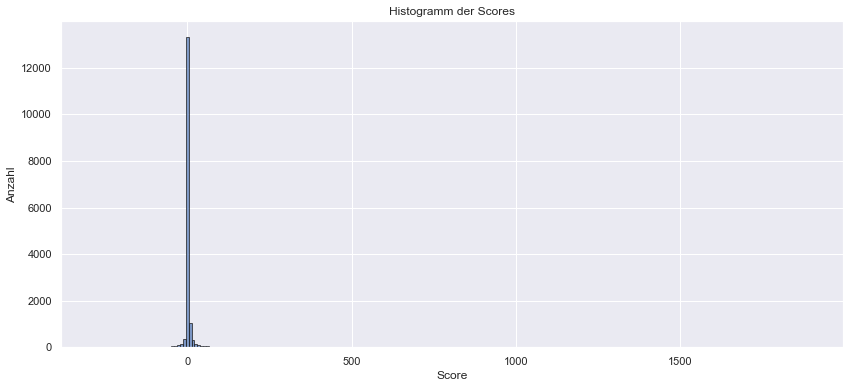

In [141]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(14, 6))
plt.hist(filtered_df['score'], bins=240, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Removed kommentare löschen

In [142]:
df = df[df['body'] != '[removed]']

[deleted]                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

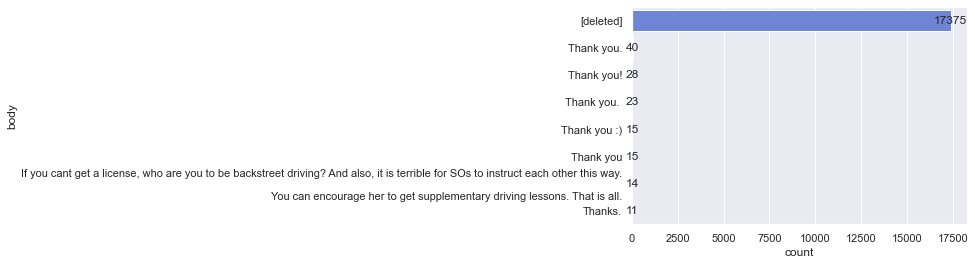

In [143]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Haben deleted Comments mehr likes

In [144]:
filtered_df_del=df[df['body'] == '[deleted]']

In [145]:
filtered_df_del

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
22,[deleted],0,1,0,0,t3_5adgc3,[deleted],0,0,0,d9g59k0,2016-11-01 00:04:45,t3_5adgc3,0.0,1.0,2016.0
45,[deleted],0,1,0,0,t3_5afsoz,[deleted],0,0,0,d9g5e7s,2016-11-01 00:07:54,t3_5afsoz,0.0,1.0,2016.0
83,[deleted],0,1,0,0,t3_5afubh,[deleted],0,0,0,d9g5n7c,2016-11-01 00:13:42,t1_d9g4urr,0.0,1.0,2016.0
96,[deleted],0,1,0,0,t3_5afz6q,[deleted],0,0,0,d9g5pzr,2016-11-01 00:15:28,t1_d9g5om1,0.0,1.0,2016.0
103,[deleted],0,1,0,0,t3_5abp9k,[deleted],0,0,0,d9g5rj2,2016-11-01 00:16:21,t1_d9fk5p6,0.0,1.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263778,[deleted],0,1,0,0,t3_5fsur5,[deleted],0,0,1,damtv4y,2016-11-30 23:47:31,t1_damt8o1,23.0,30.0,2016.0
263808,[deleted],0,4,0,0,t3_5fs9fg,[deleted],0,0,0,damu1rf,2016-11-30 23:51:35,t3_5fs9fg,23.0,30.0,2016.0
263814,[deleted],0,6,0,0,t3_5ft1p2,[deleted],0,0,0,damu2pi,2016-11-30 23:52:09,t3_5ft1p2,23.0,30.0,2016.0
263854,[deleted],0,10,0,0,t3_5fswux,[deleted],0,0,0,damu8ym,2016-11-30 23:55:59,t1_damsowg,23.0,30.0,2016.0


In [146]:
filtered_df_del.describe()

,score,created_hour,created_day,created_year
count,17375.000000,17375.000000,17375.000000,17375.0
mean,5.696115,13.159655,15.277353,2016.0
std,40.599170,7.215216,8.831834,0.0
min,-191.000000,0.000000,1.000000,2016.0
25%,1.000000,6.500000,7.000000,2016.0
50%,1.000000,15.000000,15.000000,2016.0
75%,2.000000,19.000000,23.000000,2016.0
max,1815.000000,23.000000,30.000000,2016.0


In [147]:
len(filtered_df_del)

17375

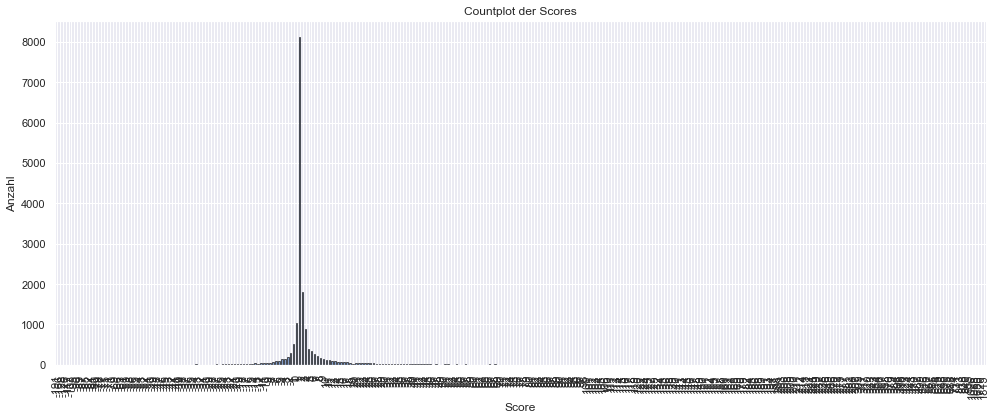

In [148]:
plt.figure(figsize=(14, 6))
counts = filtered_df_del['score'].value_counts().sort_index()
ax = counts.plot(kind='bar', edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Countplot der Scores')
plt.tight_layout()



Text(0.5, 1.0, 'Histogramm der Scores')

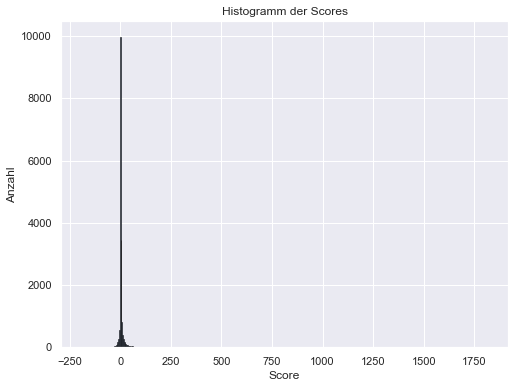

In [151]:
# Countplot für die "score"-Spalte erstellen
plt.figure(figsize=(8, 6))
plt.hist(filtered_df_del['score'], bins=500, edgecolor='k', alpha=0.7)
plt.xlabel('Score')
plt.ylabel('Anzahl')
plt.title('Histogramm der Scores')

Kommentare die Deleted wurden löschen

In [149]:
df = df[df['body'] != '[deleted]']

In [150]:
df.info() 

<class 'pandas.core.frame.DataFrame'>
Index: 225266 entries, 0 to 263892
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype         
---  ------             --------------   -----         
 0   author             225266 non-null  object        
 1   author_flair_text  225266 non-null  object        
 2   score              225266 non-null  int64         
 3   controversiality   225266 non-null  object        
 4   stickied           225266 non-null  object        
 5   link_id            225266 non-null  object        
 6   body               225266 non-null  object        
 7   distinguished      225266 non-null  object        
 8   gilded             225266 non-null  object        
 9   edited             225266 non-null  object        
 10  id                 225266 non-null  object        
 11  created_utc        225266 non-null  datetime64[ns]
 12  parent_id          225266 non-null  object        
 13  created_hour       225266 non-null  float64      

Thank you.                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                              

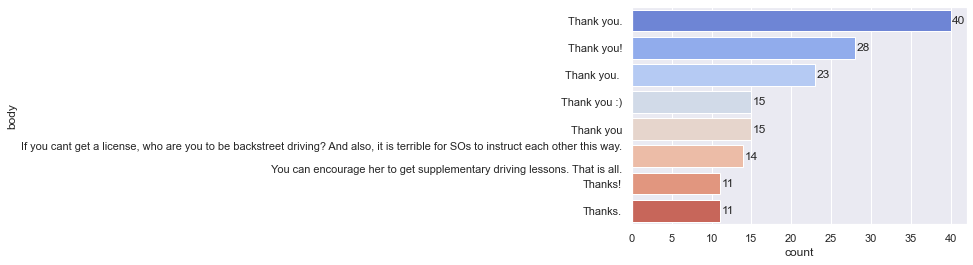

In [151]:
# Countplot für die "body"-Spalte mit den Top 3 Werten erstellen
sns.set(style="darkgrid")
ax = sns.countplot(y="body", data=df, palette="coolwarm",
              order=df.body.value_counts().iloc[:8].index)

# Counts in das Plot-Diagramm einfügen
for p in ax.patches:
    ax.annotate(f'{p.get_width()}', (p.get_width() + 1, p.get_y() + p.get_height() / 2), ha='center', va='center')

# Counts für die Werte in der "body"-Spalte ausgeben
print(df["body"].value_counts())

# Http und redditnames removes

# Lösche alle Authoren die 	AutoModerator	 sind

In [152]:
df = df.drop(df[df['author'] == 'AutoModerator'].index)

In [153]:
df

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
0,antioch75,0,4,0,0,t3_5aevs2,You really need to get a run down of what actu...,0,0,0,d9g52zy,2016-11-01 00:00:23,t3_5aevs2,0.0,1.0,2016.0
1,screelov,0,1,0,0,t3_5ack9c,"Get out of there, and don't look back. Don't s...",0,0,0,d9g532l,2016-11-01 00:00:26,t3_5ack9c,0.0,1.0,2016.0
2,loves_small_motors,0,294,0,0,t3_5afv9z,"And honestly, it's pretty bizarre that someone...",0,0,0,d9g53m1,2016-11-01 00:00:50,t1_d9g4b2o,0.0,1.0,2016.0
5,protostorm,0,17,0,0,t3_5afvbq,"Then your response is simple ""I don't want to ...",0,0,0,d9g544a,2016-11-01 00:01:09,t1_d9g4uvj,0.0,1.0,2016.0
6,cheerupchum,0,4,0,0,t3_5ae7mk,&gt; Dogs aren't tiny stupid idiots\n \n\nwait...,0,0,0,d9g54a4,2016-11-01 00:01:14,t1_d9fsj7t,0.0,1.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263888,slinky999,0,16,0,0,t3_5ft3gn,I would also add that I was desperately unhapp...,0,0,0,damuewi,2016-11-30 23:59:38,t1_damu47z,23.0,30.0,2016.0
263889,shelbyknits,0,1,0,0,t3_5ft6ew,"Given that she's been having loud, personal ca...",0,0,0,damueyo,2016-11-30 23:59:40,t3_5ft6ew,23.0,30.0,2016.0
263890,theonewithoutapic,0,13,0,0,t3_5friad,"""Exercise gives you endorphins. Endorphins mak...",0,0,0,damuf0f,2016-11-30 23:59:42,t1_damhkav,23.0,30.0,2016.0
263891,YouKnowYourCrazy,0,1,0,0,t3_5fsuzp,Context is everything. If you put this in the ...,0,0,0,damuff2,2016-11-30 23:59:57,t1_damu86x,23.0,30.0,2016.0


# Http und redditnames removes

In [154]:
selected_sub_men=df[df['body'].str.fullmatch(r'/r/[^/\s]+')]
selected_sub_men

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
14737,illredditlater,0,1,0,0,t3_5aln7a,/r/financialindependence,0,0,0,d9iayuk,2016-11-02 13:32:31,t1_d9hve4x,13.0,2.0,2016.0
82486,imgettingbetternow,0,51,0,0,t3_5c0m3a,/r/asktwelveyearoldsforrelationshipadvice,0,0,0,d9t3chz,2016-11-09 17:41:49,t1_d9t1677,17.0,9.0,2016.0
84035,Morphie12121,0,-2,0,0,t3_5bzfdw,/r/shitcrusaderkingssay,0,0,0,d9tcgkw,2016-11-09 20:44:42,t3_5bzfdw,20.0,9.0,2016.0
144535,cardinal29,0,3,0,0,t3_5d9rht,/r/AsianParentStories,0,0,0,da3hg5f,2016-11-16 23:47:48,t3_5d9rht,23.0,16.0,2016.0
164337,01001000,0,14,0,0,t3_5dow2g,/r/RedditWritesSeinfeld,0,0,0,da6b4b5,2016-11-18 23:02:46,t1_da66roq,23.0,18.0,2016.0
177793,jSubbz,0,7,0,0,t3_5dzgmq,/r/raisedbynarcissists,0,0,0,da8ubqi,2016-11-21 00:14:48,t3_5dzgmq,0.0,21.0,2016.0
220214,roninw86,0,1,0,0,t3_5eu313,/r/raisedbynarcissists,0,0,0,dafoctw,2016-11-25 23:57:02,t3_5eu313,23.0,25.0,2016.0
252504,ScrambledNegs,0,6,0,0,t3_5fl15s,/r/sugarlifestyleforum,0,0,0,dal2xg1,2016-11-29 21:21:22,t3_5fl15s,21.0,29.0,2016.0


In [155]:
df = df.drop(selected_sub_men.index)

In [156]:
selected_sub_men_two=df[df['body'].str.fullmatch(r'r/[^/\s]+')]
selected_sub_men_two

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
74946,Ethelfleda,0,4,0,0,t3_5bulqk,r/justnomil,0,0,0,d9rehx8,2016-11-08 18:23:45,t3_5bulqk,18.0,8.0,2016.0
230317,shatterspeed,0,6,0,0,t3_5f3urc,r/unexpectedhogwarts,0,0,0,dahh55p,2016-11-27 11:24:20,t1_dahbscd,11.0,27.0,2016.0


In [157]:
# Zeilen löschen, die der URL-Bedingung entsprechen
df = df.drop(selected_sub_men_two.index)

In [158]:
selected_rows = df[df['body'].str.match(r'^http://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [159]:
selected_rows_2 = df[df['body'].str.match(r'^https://[^:/\s]+/[^:/\s]+$')]

# Die ausgewählten Zeilen anzeigen
selected_rows_2

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [160]:
import re

# Regulärer Ausdruck zum Erfassen von Zeilen, die nur aus Links/URLs bestehen
url_pattern = r'^https?://[^\s/$.?#].[^\s]*$'

# Anwenden des regulären Ausdrucks auf die 'body'-Spalte
url_only_rows = df[df['body'].str.match(url_pattern, flags=re.IGNORECASE)]
url_only_rows

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
10176,bullyworkthrow,0,11,0,0,t3_5amgde,https://www.reddit.com/r/relationships/comment...,0,0,0,d9hk599,2016-11-01 23:13:17,t3_5amgde,23.0,1.0,2016.0
59394,O_Zenobia,0,5,0,0,t3_5bgsit,https://m.reddit.com/r/relationships/comments/...,0,0,0,d9oz9ru,2016-11-07 01:52:19,t1_d9os3wx,1.0,7.0,2016.0
67702,Beasag,0,1,0,0,t3_5bkw0h,https://www.reddit.com/r/Showerthoughts/commen...,0,0,0,d9q9fca,2016-11-07 23:07:41,t3_5bkw0h,23.0,7.0,2016.0
143023,whatwhatinthebutt42,0,29,0,0,t3_5dazvb,https://www.reddit.com/r/relationships/comment...,0,0,0,da3ah3b,2016-11-16 21:19:49,t3_5dazvb,21.0,16.0,2016.0


In [161]:
df.drop(url_only_rows.index, inplace=True)


# Delete Bots

In [162]:
helper_bot_rows = df[df['body'].str.startswith('Helper bot')]
helper_bot_rows

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [163]:
 df[df['author'] == 'AdviceHelperBot']

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [164]:
 df[df['author'] == 'theHelperdroid']

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [165]:
import re

bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]
bot_in_body_rows

/var/folders/88/lkbjvmyj48n6h04_m1x2v3km0000gn/T/ipykernel_37530/2615394462.py:3: UserWarning: This pattern has match groups. To actually get the groups, use str.extract.
  bot_in_body_rows = df[df['body'].str.contains(r'\b(bot)\b', case=False, regex=True)]


,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
10369,Arianity,0,1,0,0,t3_5am675,responding to a random comment because the bot...,0,0,0,d9hldhv,2016-11-01 23:39:32,t1_d9hi8hw,23.0,1.0,2016.0
13645,ArmFixerBot,0,4,0,0,t3_5an6ke,I think you were trying to make this ¯\\\_(ツ)\...,0,0,0,d9i4qjq,2016-11-02 09:12:22,t1_d9i4qgx,9.0,2.0,2016.0
17729,UncleSneakyFingers,0,0,1,0,t3_5aqv3g,&gt; The people you messaged aren't bots. They...,0,0,0,d9io4uo,2016-11-02 18:00:21,t1_d9ijbt5,18.0,2.0,2016.0
46596,berthejew,0,5,0,0,t3_5b8u09,Remind me! \n\nDoes that bot work in this sub?,0,0,0,d9mty3c,2016-11-05 13:49:01,t1_d9mr2bu,13.0,5.0,2016.0
54560,The_M0rning_Star,0,52,0,0,t3_5bfvtu,"""My michelin-starred mother is busy playing F...",0,0,0,d9o6p9m,2016-11-06 15:08:41,t3_5bfvtu,15.0,6.0,2016.0
88172,wwwtf,0,-1,0,0,t3_5bor01,But don't you see.\n\nOp presented problem a.\...,0,0,0,d9ubpnt,2016-11-10 14:22:29,t1_d9srxdi,14.0,10.0,2016.0
88330,jordomm,0,8,0,0,t3_5c6xbo,You stupid little child. There is no other way...,0,0,0,d9ucssx,2016-11-10 14:49:40,t3_5c6xbo,14.0,10.0,2016.0
110876,Nora_Oie,0,2,0,0,t3_5cq2ws,Advice isn't always what we want to hear. You ...,0,0,0,d9yh1b7,2016-11-13 15:13:15,t1_d9ygnb7,15.0,13.0,2016.0
145286,AcidicBlink,0,3,0,0,t3_5dcynx,Well it seems like he's not willing to comprim...,0,0,0,da3luzq,2016-11-17 01:33:21,t3_5dcynx,1.0,17.0,2016.0
159462,iownakeytar,0,59,0,0,t3_5dmvqf,Have you tried talking to your boyfriend about...,0,0,0,da5py0x,2016-11-18 15:23:47,t3_5dmvqf,15.0,18.0,2016.0


In [166]:
df_bot=pd.read_csv("bot_names.csv")

In [167]:

df_bot["Bot Name"].values.tolist()

selection = df_bot["Bot Name"].values.tolist()
mask = df["author"].apply(lambda x: any(item for item in selection if item in x)) 

In [168]:
#mask[mask].index
df_check_bot=df.filter(items = mask[mask].index, axis=0)
#df_13_bot.duplicated(subset=['clean_text'])#

In [169]:
df_check_bot
#hotcaulk	

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
80,hotcaulk,0,2,0,0,t3_5adf26,She added the extra information about the unin...,0,0,0,d9g5m9i,2016-11-01 00:13:04,t1_d9g5dnq,0.0,1.0,2016.0
151,hottytoddy887,0,2,0,0,t3_5adi4p,Thank you! I kept scrolling thinking I was the...,0,0,0,d9g62gf,2016-11-01 00:23:12,t1_d9g3n3q,0.0,1.0,2016.0
276,hotcheetoz32,0,30,0,0,t3_5ae71p,Ehhh I mean she's his coworker. She'd probably...,0,0,0,d9g7050,2016-11-01 00:44:51,t1_d9fzrn8,0.0,1.0,2016.0
297,Inquisitor1119,0,20,0,0,t3_5afv9z,And then spending it on an expensive restauran...,0,0,0,d9g73hw,2016-11-01 00:47:01,t1_d9g4b2o,0.0,1.0,2016.0
386,hotcaulk,0,0,0,0,t3_5adf26,notice how you leave out that you escalated th...,0,0,0,d9g7q1w,2016-11-01 01:01:51,t1_d9g6ij2,1.0,1.0,2016.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
263331,laserchaser,0,1,0,0,t3_5fsu65,"I haven't been in your situation, so, grain of...",0,0,1,damrxm6,2016-11-30 23:06:07,t3_5fsu65,23.0,30.0,2016.0
263449,laserchaser,0,12,0,0,t3_5fswux,Not overreacting at all. Your kid just learned...,0,0,0,damsfon,2016-11-30 23:16:46,t3_5fswux,23.0,30.0,2016.0
263650,xemaximus,0,1,0,0,t3_5fs7se,Absolutely none of your business....butt out. ...,0,0,0,damt9vv,2016-11-30 23:34:40,t3_5fs7se,23.0,30.0,2016.0
263686,laserchaser,0,4,0,0,t3_5fswux,Knowing he's loved no matter who he is at home...,0,0,0,damtekx,2016-11-30 23:37:26,t1_damt41m,23.0,30.0,2016.0


In [170]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[15:17]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
123736,Shrugfacebot,0,11,0,0,t3_5cvt3l,**TL;DR:** Type in ¯\\\\\\\_(ツ)\_/¯ for prope...,0,0,0,da0hc6r,2016-11-14 23:04:55,t1_da0hc3s,23.0,14.0,2016.0
140532,Shrugfacebot,0,0,0,0,t3_5d9x7f,**TL;DR:** Type in ¯\\\\\\\_(ツ)\_/¯ for prope...,0,0,0,da2yl3h,2016-11-16 17:21:34,t1_da2yl02,17.0,16.0,2016.0


In [171]:
#Shrugfacebot
df[df['author'].str.contains('Shrugfacebot')]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
123736,Shrugfacebot,0,11,0,0,t3_5cvt3l,**TL;DR:** Type in ¯\\\\\\\_(ツ)\_/¯ for prope...,0,0,0,da0hc6r,2016-11-14 23:04:55,t1_da0hc3s,23.0,14.0,2016.0
140532,Shrugfacebot,0,0,0,0,t3_5d9x7f,**TL;DR:** Type in ¯\\\\\\\_(ツ)\_/¯ for prope...,0,0,0,da2yl3h,2016-11-16 17:21:34,t1_da2yl02,17.0,16.0,2016.0


In [172]:
df = df[~df['author'].str.contains('Shrugfacebot')]

In [173]:
df[df['author'].str.contains('Shrugfacebot')]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [178]:
df[df['body'].str.contains("bloop", case=False, regex=True)]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
67402,fearfulleader,0,1,0,0,t3_5bozmk,You sound like you're really hard on yourself....,0,0,1,d9q7mv5,2016-11-07 22:28:52,t3_5bozmk,22.0,7.0,2016.0


In [179]:
df[df['body'].str.contains("bleep", case=False, regex=True)]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [180]:
df_check_bot[df_check_bot['author'].str.contains('bot')]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
20420,captcha_bot,0,57,0,0,t3_5asuxd,"To add on to this, it doesn't sound like you s...",0,0,0,d9j0qnu,2016-11-02 22:06:19,t1_d9j0lce,22.0,2.0,2016.0
37671,kitty_spankbottom,0,19,0,0,t3_5b36c8,That part stood out to me too. I remember feel...,0,0,0,d9lod9h,2016-11-04 16:36:52,t1_d9lnajb,16.0,4.0,2016.0
42739,spankybottom,0,28,0,0,t3_5b4zxl,Depends on where he lives.,0,0,0,d9m8r8o,2016-11-04 23:43:07,t1_d9m80un,23.0,4.0,2016.0
42781,spankybottom,0,37,0,0,t3_5b5iuo,Short dumbfounded stare followed by a slow bli...,0,0,0,d9m908k,2016-11-04 23:49:25,t1_d9m5kul,23.0,4.0,2016.0
42817,spankybottom,0,-1,0,0,t3_5b5iuo,Are you Redhead Kingpin?\n\nSorry. Couldn't r...,0,0,0,d9m97c3,2016-11-04 23:54:23,t3_5b5iuo,23.0,4.0,2016.0
49486,not_a_bot__,0,3,0,0,t3_5b9phx,"I see people very quick to judge the guy here,...",0,0,0,d9navuz,2016-11-05 20:58:13,t3_5b9phx,20.0,5.0,2016.0
54784,shrewdbottom,0,24,0,0,t3_5bf5te,You shouldn't have to be taking care of him bu...,0,0,0,d9o7tb0,2016-11-06 15:37:44,t1_d9o17vb,15.0,6.0,2016.0
66721,not_a_bot__,0,22,0,0,t3_5bn17e,"I mean, its possible and all but that also sou...",0,0,0,d9q46yx,2016-11-07 21:21:02,t1_d9q37lc,21.0,7.0,2016.0
87030,NevilleBigbottom,0,2,0,0,t3_5c66lw,Most guys have neutral or positive feelings ab...,0,0,0,d9u1t40,2016-11-10 07:13:48,t3_5c66lw,7.0,10.0,2016.0
90777,NevilleBigbottom,0,1,0,0,t3_5c66lw,"Sure homophobia exists, but that's way more pr...",0,0,0,d9utlt6,2016-11-10 20:22:36,t1_d9u6zu8,20.0,10.0,2016.0


In [222]:
df_check_bot[df_check_bot['author'].str.contains('bot')].iloc[38]["body"]

'"don\'t date men"\n\n"k thanks"'

In [223]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Liste der zu löschenden Autorenwerte
zu_loeschende_autoren = ['Shrugfacebot']

# Lösche alle Zeilen, in denen die Spalte "author" die genannten Werte hat
df = df[~df['author'].isin(zu_loeschende_autoren)]

# Jetzt enthält 'df' den DataFrame ohne die Zeilen, die die genannten Autorenwerte in der Spalte "author" haben

In [225]:
df_check_bot[df_check_bot['body'].str.contains('Bot')]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year
23585,double0nothing,0,3,0,0,t3_5avg1g,"Ask if her name is Jenny. She says no, you say...",0,0,0,d9jpa5n,2016-11-03 07:57:46,t3_5avg1g,7.0,3.0,2016.0
54850,Illier1,0,-49,0,0,t3_5bflk2,If someone is unwilling to forgive a god damn ...,0,0,0,d9o88n8,2016-11-06 15:48:37,t1_d9o7yz1,15.0,6.0,2016.0
61881,Pinglenook,0,10,0,0,t3_5bhaga,Some people see Facebook photos like photos in...,0,0,1,d9pg8ig,2016-11-07 12:27:15,t1_d9okgsq,12.0,7.0,2016.0
94347,hotcaulk,0,2,1,0,t3_5cbjx1,"That is logical. On the other hand, I've been ...",0,0,0,d9vkxw5,2016-11-11 07:29:12,t1_d9vi6vl,7.0,11.0,2016.0
193767,Listentotheadviceman,0,2,0,0,t3_5eapl2,Can someone please explain the difference betw...,0,0,0,dab9wt4,2016-11-22 18:22:10,t3_5eapl2,18.0,22.0,2016.0
196209,Nachotacoma,0,2,0,0,t3_5ebqy4,I've been in both situations before. \n\nI ...,0,0,0,dablk61,2016-11-22 22:10:17,t3_5ebqy4,22.0,22.0,2016.0
196510,maximusthrowaway,0,6,0,0,t3_5ebqy4,Not sure I agree. \n\na. Was not snooping. We ...,0,0,0,dabnblf,2016-11-22 22:48:17,t1_dablq60,22.0,22.0,2016.0
248541,IncredibleBulk2,0,1,0,0,t3_5fbg1e,Off the rails indeed.\n\nIs there a way you ca...,0,0,0,dakjpew,2016-11-29 14:57:38,t1_daki3zv,14.0,29.0,2016.0


In [228]:
df[df['author'].str.contains('Shrugfacebot')]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [229]:
df[df['author'] == 'Shrugfacebot']

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


# NLP cleaning

In [47]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [33]:
df=pd.read_csv("relationship_16_comments_EDA_clean.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225250 entries, 0 to 225249
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             225250 non-null  object 
 1   author_flair_text  225250 non-null  int64  
 2   score              225250 non-null  int64  
 3   controversiality   225250 non-null  int64  
 4   stickied           225250 non-null  int64  
 5   link_id            225250 non-null  object 
 6   body               225250 non-null  object 
 7   distinguished      225250 non-null  object 
 8   gilded             225250 non-null  int64  
 9   edited             225250 non-null  int64  
 10  id                 225250 non-null  object 
 11  created_utc        225250 non-null  object 
 12  parent_id          225250 non-null  object 
 13  created_hour       225250 non-null  int64  
 14  created_day        225250 non-null  float64
 15  created_year       225250 non-null  float64
dtypes:

In [35]:
import redditcleaner
df['body'] = df['body'].map(redditcleaner.clean)

In [36]:
import pandas as pd
import re
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import emoji

# Schritt 1: Emojis und Emoticons in Emojis umwandeln, aber Kleinbuchstaben beibehalten
def convert_emoticons_and_emojis(text):
    text = emoji.demojize(text)
    return text

# Schritt 2: Tokenisierung
nltk.download('punkt')

# Schritt 3: Entfernen von Stoppwörtern
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))  # Verwenden Sie die passende Sprache

# Schritt 4: Entfernen von Sonderzeichen und URLs
def clean_text(text):
    # Entfernen von HTML-Tags
    text = re.sub(r'<.*?>', '', text)
    
    # Entfernen von URLs
    text = re.sub(r'http\S+', '', text)
    text = re.sub(r'https\S+', '', text)
    
    # Entfernen von Zahlen
    text = re.sub('[0-9]+', '', text)
    
    text = re.sub(r'/r/[A-Za-z0-9_]+', '', text)
    text = re.sub(r'r/[A-Za-z0-9_]+', '', text) # mit subreddit löschen
    
    # Entfernen von Sonderzeichen außer Buchstaben, Zahlen und Punkten
    text = re.sub('[^A-Za-z0-9.]+', ' ', text)
    
    # Tokenisierung
    words = word_tokenize(text)
    
    # Entfernen von Stoppwörtern
    #words = [word for word in words if word not in stop_words]
    
    # Entfernen von leeren Wörtern
    words = [word for word in words if word.strip() != '']
    
    return ' '.join(words)

# Anwenden der Bereinigungsfunktion auf den Text in der Spalte 'body'
df['clean_text'] = df['body'].apply(lambda x: convert_emoticons_and_emojis(x))
df['clean_text'] = df['clean_text'].apply(clean_text)

# Anzeigen des resultierenden DataFrames
print(df[['body', 'clean_text']])

[nltk_data] Downloading package punkt to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     /Users/anthonyfernando/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


                                                     body  \
0       You really need to get a run down of what actu...   
1       Get out of there, and don't look back. Don't s...   
2       And honestly, it's pretty bizarre that someone...   
3       Then your response is simple "I don't want to ...   
4                Dogs aren't tiny stupid idiots wait what   
...                                                   ...   
225245  I would also add that I was desperately unhapp...   
225246  Given that she's been having loud, personal ca...   
225247  "Exercise gives you endorphins. Endorphins mak...   
225248  Context is everything. If you put this in the ...   
225249  Well hello you big sexy man That is not approp...   

                                               clean_text  
0       You really need to get a run down of what actu...  
1       Get out of there and don t look back . Don t s...  
2       And honestly it s pretty bizarre that someone ...  
3       Then your response 

In [37]:
df["comment_len"] = df["clean_text"].apply (lambda x: len(x.split()))

In [38]:
import pandas as pd

# Annahme: Du hast bereits ein DataFrame df erstellt

# Filtere die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df = df[df['comment_len'] == 0]

# Jetzt enthält filtered_df nur die Zeilen, in denen "comment_len" den Wert 0 hat
filtered_df

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len
332,loves_small_motors,0,1,0,0,t3_5affvg,,0,0,0,d9g7n67,2016-11-01 01:00:00,t3_5affvg,1,1.0,2016.0,,0
12457,RatherSleepIn,0,2,0,0,t3_5amya4,r/AsianParentStories/,0,0,0,d9i9sor,2016-11-02 13:00:18,t3_5amya4,13,2.0,2016.0,,0
19118,mericoptero_,0,1,0,0,t3_5atr8q,100%,0,0,0,d9jd2w9,2016-11-03 02:26:59,t1_d9jbvax,2,3.0,2016.0,,0
28788,throwawayggggggggg7,0,6,0,0,t3_5b0dzm,3,0,0,0,d9l32ga,2016-11-04 04:32:14,t1_d9l31hq,4,4.0,2016.0,,0
35063,Antin3rf,0,38,0,0,t3_5b4gro,,0,0,0,d9lzb3e,2016-11-04 20:09:13,t1_d9lx9vc,20,4.0,2016.0,,0
36051,bitter_barista,0,14,0,0,t3_5b4gro,,0,0,0,d9m3yoa,2016-11-04 21:47:51,t1_d9m3bkz,21,4.0,2016.0,,0
42684,vova-v,0,-6,0,0,t3_5bbci2,¯\_(ツ)_/¯,0,0,0,d9nb2qr,2016-11-05 21:03:01,t1_d9nb1ac,21,5.0,2016.0,,0
44451,messofnerves,0,2,0,0,t3_5bcumj,:),0,0,0,d9nnof4,2016-11-06 02:12:18,t1_d9ni8py,2,6.0,2016.0,,0
48762,sailorneptune227,0,1,0,0,t3_5bhbls,?,0,0,0,d9ohq48,2016-11-06 19:27:20,t1_d9ohktr,19,6.0,2016.0,,0
58480,rebelheart,0,3,0,0,t3_5bm1ae,,0,0,0,d9qb19w,2016-11-07 23:43:17,t1_d9pr3de,23,7.0,2016.0,,0


In [40]:
df = df[df['comment_len'] != 0]

# Final EDA

In [75]:
df.info()
#225250

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225213 entries, 0 to 225249
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             225213 non-null  object 
 1   author_flair_text  225213 non-null  int64  
 2   score              225213 non-null  int64  
 3   controversiality   225213 non-null  int64  
 4   stickied           225213 non-null  int64  
 5   link_id            225213 non-null  object 
 6   body               225213 non-null  object 
 7   distinguished      225213 non-null  object 
 8   gilded             225213 non-null  int64  
 9   edited             225213 non-null  int64  
 10  id                 225213 non-null  object 
 11  created_utc        225213 non-null  object 
 12  parent_id          225213 non-null  object 
 13  created_hour       225213 non-null  int64  
 14  created_day        225213 non-null  float64
 15  created_year       225213 non-null  float64
 16  cl

In [76]:
df.describe()

,author_flair_text,score,controversiality,stickied,gilded,edited,created_hour,created_day,created_year,comment_len
count,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.000000,225213.000000,225213.000000,225213.0,225213.000000
mean,0.0,18.610080,0.025807,0.000004,0.000271,0.034496,13.263568,15.089142,2016.0,75.938472
std,0.0,76.714045,0.158559,0.002107,0.016455,0.182500,7.152977,8.832397,0.0,82.900619
min,0.0,-549.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2016.0,1.000000
25%,0.0,1.000000,0.000000,0.000000,0.000000,0.000000,7.000000,7.000000,2016.0,25.000000
50%,0.0,3.000000,0.000000,0.000000,0.000000,0.000000,15.000000,15.000000,2016.0,51.000000
75%,0.0,11.000000,0.000000,0.000000,0.000000,0.000000,19.000000,22.000000,2016.0,96.000000
max,0.0,4480.000000,1.000000,1.000000,1.000000,1.000000,23.000000,30.000000,2016.0,1988.000000


In [77]:
df.head()

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len
0,antioch75,0,4,0,0,t3_5aevs2,You really need to get a run down of what actu...,0,0,0,d9g52zy,2016-11-01 00:00:23,t3_5aevs2,0,1.0,2016.0,You really need to get a run down of what actu...,40
1,screelov,0,1,0,0,t3_5ack9c,"Get out of there, and don't look back. Don't s...",0,0,0,d9g532l,2016-11-01 00:00:26,t3_5ack9c,0,1.0,2016.0,Get out of there and don t look back . Don t s...,21
2,loves_small_motors,0,294,0,0,t3_5afv9z,"And honestly, it's pretty bizarre that someone...",0,0,0,d9g53m1,2016-11-01 00:00:50,t1_d9g4b2o,0,1.0,2016.0,And honestly it s pretty bizarre that someone ...,72
3,protostorm,0,17,0,0,t3_5afvbq,"Then your response is simple ""I don't want to ...",0,0,0,d9g544a,2016-11-01 00:01:09,t1_d9g4uvj,0,1.0,2016.0,Then your response is simple I don t want to h...,44
4,cheerupchum,0,4,0,0,t3_5ae7mk,Dogs aren't tiny stupid idiots wait what,0,0,0,d9g54a4,2016-11-01 00:01:14,t1_d9fsj7t,0,1.0,2016.0,Dogs aren t tiny stupid idiots wait what,8


In [78]:
df.tail()

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len
225245,slinky999,0,16,0,0,t3_5ft3gn,I would also add that I was desperately unhapp...,0,0,0,damuewi,2016-11-30 23:59:38,t1_damu47z,23,30.0,2016.0,I would also add that I was desperately unhapp...,149
225246,shelbyknits,0,1,0,0,t3_5ft6ew,"Given that she's been having loud, personal ca...",0,0,0,damueyo,2016-11-30 23:59:40,t3_5ft6ew,23,30.0,2016.0,Given that she s been having loud personal cal...,46
225247,theonewithoutapic,0,13,0,0,t3_5friad,"""Exercise gives you endorphins. Endorphins mak...",0,0,0,damuf0f,2016-11-30 23:59:42,t1_damhkav,23,30.0,2016.0,Exercise gives you endorphins . Endorphins mak...,23
225248,YouKnowYourCrazy,0,1,0,0,t3_5fsuzp,Context is everything. If you put this in the ...,0,0,0,damuff2,2016-11-30 23:59:57,t1_damu86x,23,30.0,2016.0,Context is everything . If you put this in the...,127
225249,firingallcylinders,0,100,0,0,t3_5ft6ed,Well hello you big sexy man That is not approp...,0,0,0,damuff6,2016-11-30 23:59:57,t3_5ft6ed,23,30.0,2016.0,Well hello you big sexy man That is not approp...,67


In [79]:
df.info()
#225264


<class 'pandas.core.frame.DataFrame'>
Int64Index: 225213 entries, 0 to 225249
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             225213 non-null  object 
 1   author_flair_text  225213 non-null  int64  
 2   score              225213 non-null  int64  
 3   controversiality   225213 non-null  int64  
 4   stickied           225213 non-null  int64  
 5   link_id            225213 non-null  object 
 6   body               225213 non-null  object 
 7   distinguished      225213 non-null  object 
 8   gilded             225213 non-null  int64  
 9   edited             225213 non-null  int64  
 10  id                 225213 non-null  object 
 11  created_utc        225213 non-null  object 
 12  parent_id          225213 non-null  object 
 13  created_hour       225213 non-null  int64  
 14  created_day        225213 non-null  float64
 15  created_year       225213 non-null  float64
 16  cl

# Stickied

In [80]:
df['stickied'] = df['stickied'].replace(0,False)
df['stickied'] = df['stickied'].replace(1,True)

False    225212
True          1
Name: stickied, dtype: int64


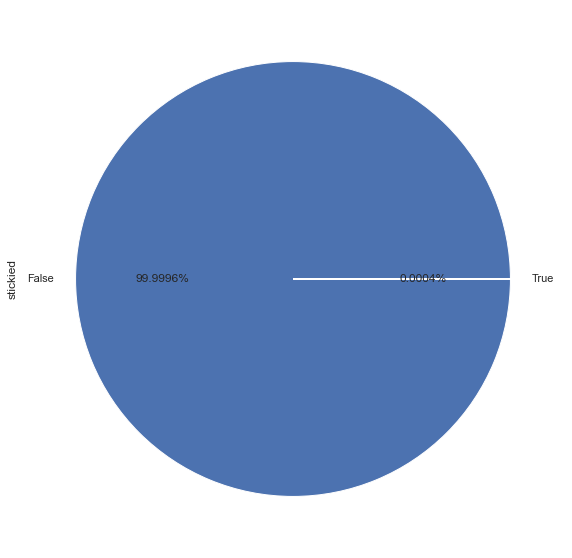

In [82]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["stickied"].value_counts().plot(kind='pie', autopct='%1.4f%%')
print(df["stickied"].value_counts())

# Link_id

t3_5ez4e0    605
t3_5df344    576
t3_5d2b49    490
t3_5an6ke    465
t3_5eacyk    442
            ... 
t3_5fd72a      1
t3_5bi1d7      1
t3_58ok1v      1
t3_5bidec      1
t3_5ft6ed      1
Name: link_id, Length: 13150, dtype: int64


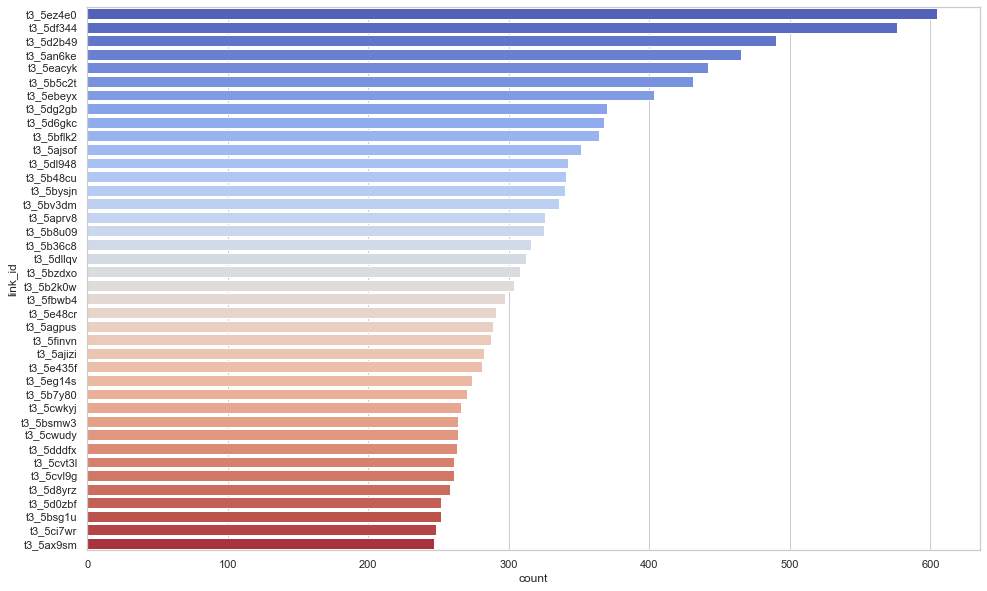

In [83]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="link_id", data=df, palette="coolwarm",
              order=df.link_id.value_counts().iloc[:40].index)
print(df["link_id"].value_counts())

In [84]:
total_submissions = df['link_id'].nunique()

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Einreichungen (Submissions): {total_submissions}')

Gesamtanzahl der Einreichungen (Submissions): 13150


# Author

<AxesSubplot:xlabel='count', ylabel='author'>

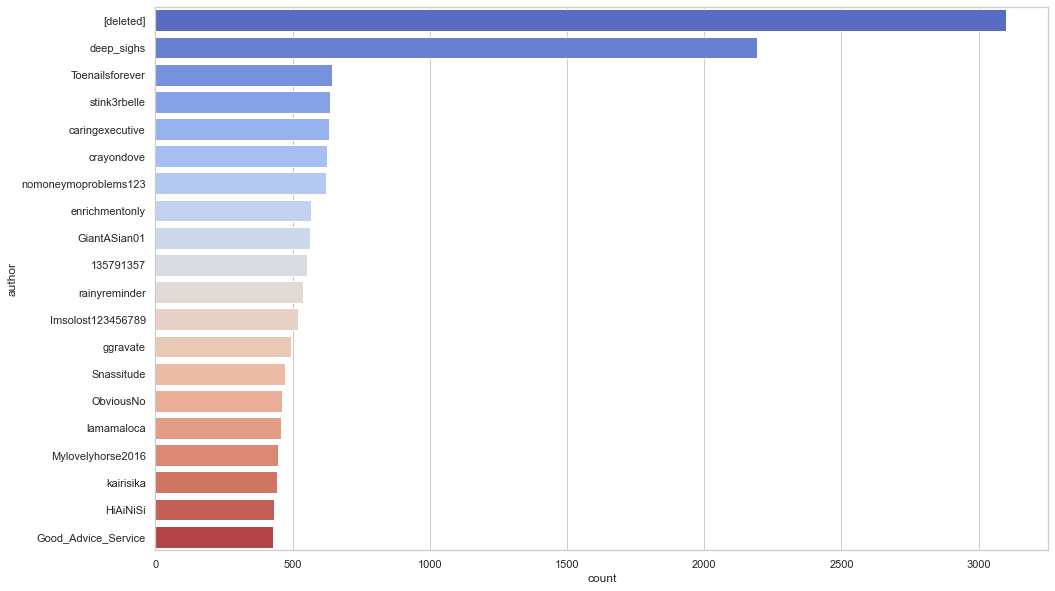

In [85]:
fig = plt.figure(figsize=(16,10))
sns.countplot(y="author", data=df, palette="coolwarm",
              order=df.author.value_counts().iloc[:20].index)

# Ohne Deleted

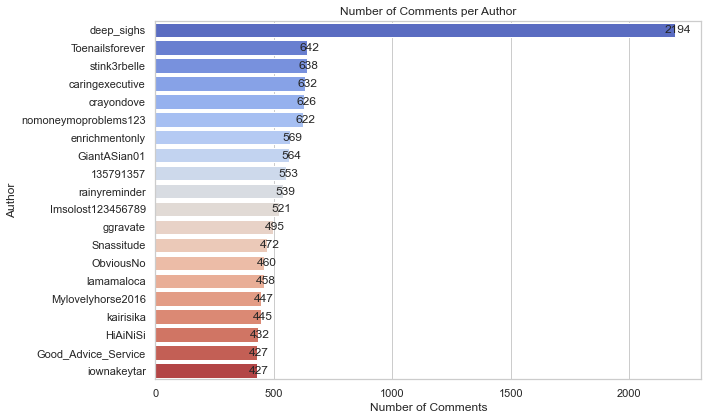

In [86]:
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits ein DataFrame mit einer "author" Spalte (z.B., df)

# Top 5 Autoren nach Anzahl der Kommentare auswählen und "[deleted]" entfernen
top_authors = df[df['author'] != '[deleted]']['author'].value_counts().iloc[:20].index

# Sub-Datenframe nur mit den Top-Autoren erstellen (ohne "[deleted]")
top_comments = df[(df['author'].isin(top_authors)) & (df['author'] != '[deleted]')]

# Countplot erstellen
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
plot = sns.countplot(y="author", data=top_comments, palette="coolwarm", order=top_authors)

# Anzahl der Kommentare über den Balken anzeigen
for p in plot.patches:
    plot.annotate(format(p.get_width(), '.0f'),
                  (p.get_width() + 10, p.get_y() + p.get_height() / 2),
                  ha='center', va='center')

plt.xlabel("Number of Comments")
plt.ylabel("Author")
plt.title("Number of Comments per Author")

# Achsenbeschriftungen nicht abschneiden
plt.tight_layout()
plt.show()

In [87]:
total_author = df['author'].nunique()-1

# Das Ergebnis anzeigen
print(f'Gesamtanzahl der Authoren: {total_author}')

Gesamtanzahl der Authoren: 32772


In [88]:
# Group by "link_id" and count the number of comments per submission
submission_comment_counts = df.groupby('link_id')['body'].count()

# Calculate the average number of comments per submission
average_comments_per_submission = submission_comment_counts.mean()

# Display the result
print(f'Average number of comments per submission: {average_comments_per_submission:.2f}')

Average number of comments per submission: 17.13


In [89]:
# Group by "author" and count the number of comments per author
author_comment_counts = df.groupby('author')['body'].count()

# Calculate the average number of comments per author
average_comments_per_author = author_comment_counts.mean()

# Display the result
print(f'Average number of comments per author: {average_comments_per_author:.2f}')

Average number of comments per author: 6.87


# Hours

([<matplotlib.axis.XTick at 0x7fbf7808a970>,
 [Text(0, 0, '0'),
  Text(1, 0, '1'),
  Text(2, 0, '2'),
  Text(3, 0, '3'),
  Text(4, 0, '4'),
  Text(5, 0, '5'),
  Text(6, 0, '6'),
  Text(7, 0, '7'),
  Text(8, 0, '8'),
  Text(9, 0, '9'),
  Text(10, 0, '10'),
  Text(11, 0, '11'),
  Text(12, 0, '12'),
  Text(13, 0, '13'),
  Text(14, 0, '14'),
  Text(15, 0, '15'),
  Text(16, 0, '16'),
  Text(17, 0, '17'),
  Text(18, 0, '18'),
  Text(19, 0, '19'),
  Text(20, 0, '20'),
  Text(21, 0, '21'),
  Text(22, 0, '22'),
  Text(23, 0, '23')])

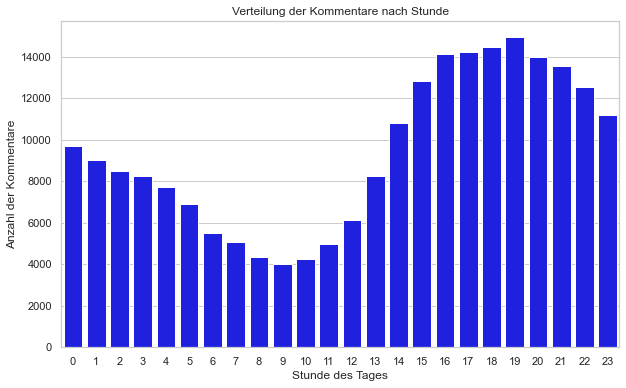

In [90]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"
#df['created_hour'] = pd.to_datetime(df['created_utc'], unit='s').dt.hour

# Erstelle das Countplot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='created_hour', color='blue')

plt.title('Verteilung der Kommentare nach Stunde')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')
plt.xticks(range(24))  # Setze x-Achse auf Stunden

# Days

Text(0, 0.5, 'Anzahl der Kommentare')

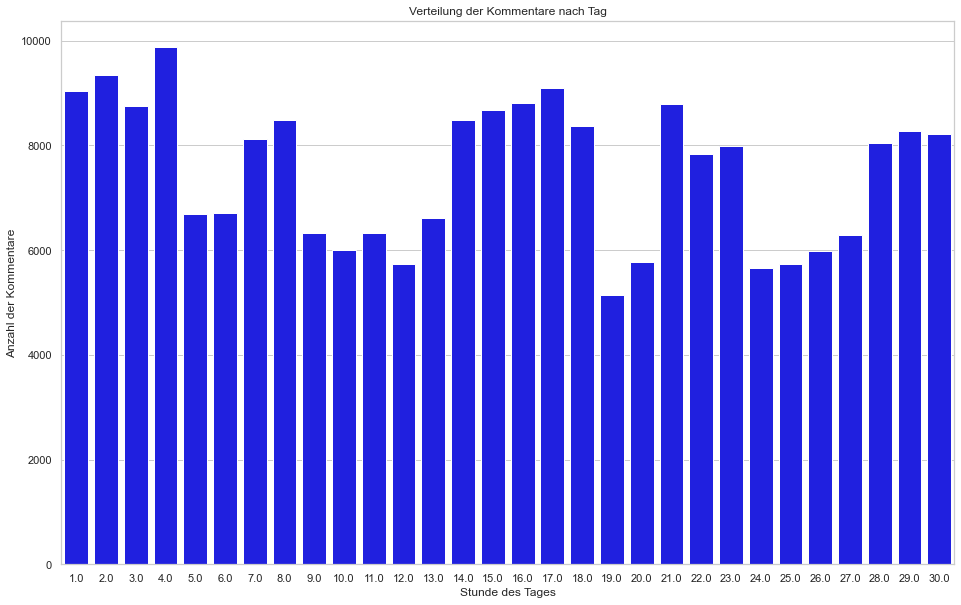

In [91]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: Du hast bereits den DataFrame "comments_new" geladen

# Extrahiere die Stunden aus der Spalte "created_utc"

# Erstelle das Countplot
fig = plt.figure(figsize=(16,10))
sns.countplot(data=df, x='created_day', color='blue')

plt.title('Verteilung der Kommentare nach Tag')
plt.xlabel('Stunde des Tages')
plt.ylabel('Anzahl der Kommentare')

# Gilded

In [94]:
df['gilded'] = df['gilded'].replace(0,"0")
df['gilded'] = df['gilded'].replace(1,"1")


In [95]:
df['gilded'] = df['gilded'].replace("0",False)
df['gilded'] = df['gilded'].replace("1",True)

False    225152
True         61
Name: gilded, dtype: int64


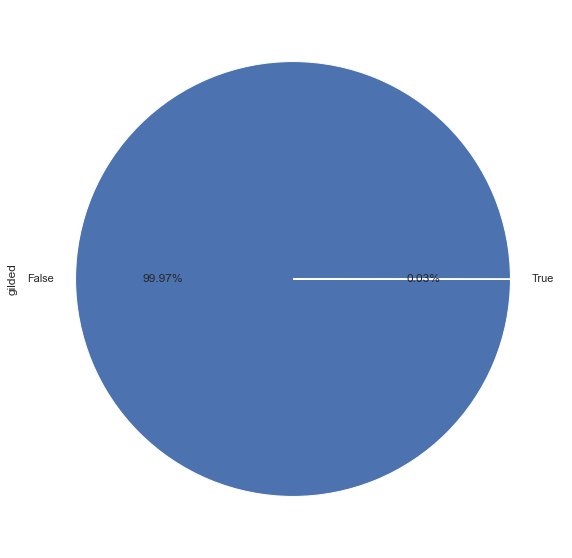

In [96]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["gilded"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["gilded"].value_counts())

# Distinguised

In [97]:
df["distinguished"] = df["distinguished"].replace(0,"0")

In [98]:
df["distinguished"] = df["distinguished"].replace("0",False)

False        225174
moderator        39
Name: distinguished, dtype: int64


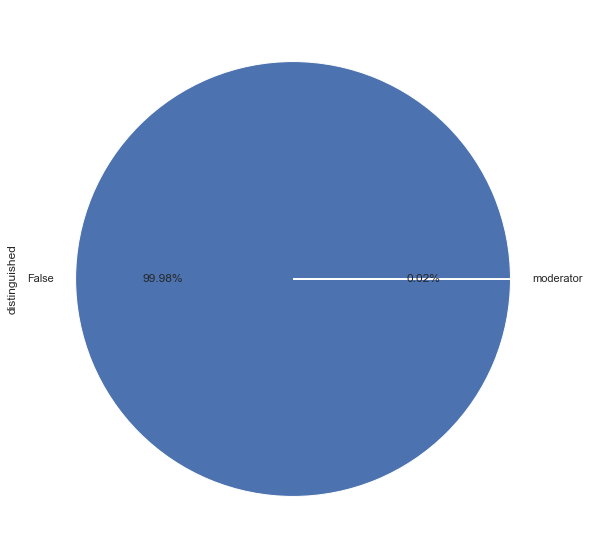

In [99]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["distinguished"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["distinguished"].value_counts())

# Edited

In [100]:
df['edited'] = df['edited'].replace(0,"0")
df['edited'] = df['edited'].replace(1,"1")
df['edited'] = df['edited'].replace("0",False)
df['edited'] = df['edited'].replace("1",True)

False    217444
True       7769
Name: edited, dtype: int64


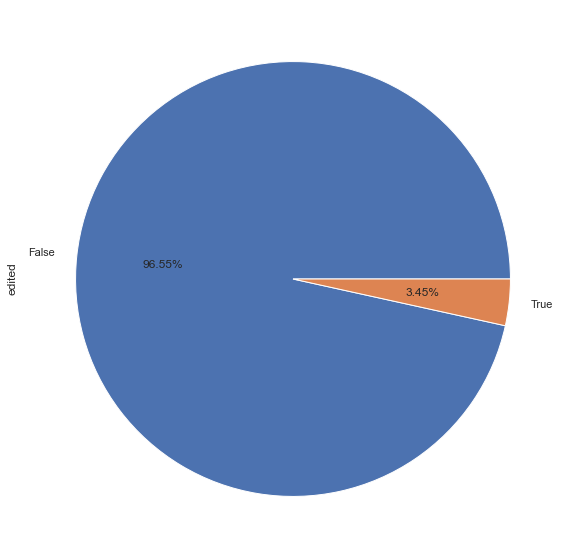

In [101]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
df["edited"].value_counts().plot(kind='pie', autopct='%1.2f%%')
print(df["edited"].value_counts())

# Score

In [102]:
df["score"].mean()

18.610080235155163

In [103]:
top_10_scores = df.nlargest(10, 'score')
top_10_scores

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len
146792,Aikistan,0,4480,0,False,t3_5dvh5d,You've been dating 2 years and he doesn't thin...,False,False,False,da7l87w,2016-11-20 00:30:25,t3_5dvh5d,0,20.0,2016.0,You ve been dating years and he doesn t think ...,25
63953,Jilltro,0,3823,0,False,t3_5bulqk,Go visit your mother on your own. She sounds u...,False,False,False,d9rbzvt,2016-11-08 17:36:48,t3_5bulqk,17,8.0,2016.0,Go visit your mother on your own . She sounds ...,24
12551,lilo-stop-stitchin,0,3630,0,False,t3_5aprv8,You're dead to them now. Cut contact.,False,True,False,d9ia97l,2016-11-02 13:13:43,t3_5aprv8,13,2.0,2016.0,You re dead to them now . Cut contact .,10
53366,jodes,0,3613,0,False,t3_5bm0w5,I can pretty much guarantee that there's been ...,False,False,False,d9phqxv,2016-11-07 13:24:12,t3_5bm0w5,13,7.0,2016.0,I can pretty much guarantee that there s been ...,154
164929,MrCapitalismWildRide,0,3600,0,False,t3_5ebeyx,"""No. They were left to me, and I won't disresp...",False,False,False,dab315m,2016-11-22 16:02:15,t3_5ebeyx,16,22.0,2016.0,No . They were left to me and I won t disrespe...,52
127828,fishyfaced,0,3574,0,False,t3_5dg2gb,Honestly I'm sure your coworker will want to c...,False,False,False,da47p9v,2016-11-17 14:38:40,t3_5dg2gb,14,17.0,2016.0,Honestly I m sure your coworker will want to c...,75
183000,Doughchild,0,3343,0,False,t3_5er0lq,It makes her uncomfortable. Ask Marco if there...,False,False,False,daeivw0,2016-11-25 01:26:15,t3_5er0lq,1,25.0,2016.0,It makes her uncomfortable . Ask Marco if ther...,46
20724,thumb_of_justice,0,3272,0,False,t3_5avsbp,"Tell everyone, ""Nothing would make me happier ...",False,False,False,d9js8q0,2016-11-03 10:46:57,t3_5avsbp,10,3.0,2016.0,Tell everyone Nothing would make me happier th...,68
47692,deep_sighs,0,3107,0,False,t3_5bgowc,I think it's no weirder than splitting/alterna...,False,False,False,d9ob4au,2016-11-06 16:59:12,t3_5bgowc,16,6.0,2016.0,I think it s no weirder than splitting alterna...,28
12578,mudbunny,0,3076,0,False,t3_5aprv8,This is the type of prank that could easily co...,False,False,False,d9iadta,2016-11-02 13:17:13,t3_5aprv8,13,2.0,2016.0,This is the type of prank that could easily co...,30


In [104]:
bottom_10_scores = df.nsmallest(10, 'score')
bottom_10_scores

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len
110158,Gaunt4ty,0,-549,0,False,t3_5d2b49,"UYh, this is my house. I own it. He does not h...",False,False,False,da18hq6,2016-11-15 14:00:16,t1_da17c3o,14,15.0,2016.0,UYh this is my house . I own it . He does not ...,25
110157,Gaunt4ty,0,-450,0,False,t3_5d2b49,"There's no point ""voicing my concerns to him"" ...",False,False,False,da18guc,2016-11-15 13:59:35,t1_da16gob,13,15.0,2016.0,There s no point voicing my concerns to him be...,14
29828,brokeintomyown,0,-435,0,False,t3_5b2e83,"Yes, because in his class they are thought to ...",False,False,False,d9la4tp,2016-11-04 09:56:57,t1_d9l8hdv,9,4.0,2016.0,Yes because in his class they are thought to r...,80
93554,nothingforson,0,-403,0,False,t3_5copo0,We've done a paternity test and it came back s...,False,False,False,d9y9879,2016-11-13 08:30:38,t1_d9y8yj3,8,13.0,2016.0,We ve done a paternity test and it came back s...,22
949,dwandanian,0,-371,0,False,t3_5agpus,"Well, he's got a heart of gold. He's a very se...",False,False,False,d9gch1w,2016-11-01 02:54:49,t1_d9gcca2,2,1.0,2016.0,Well he s got a heart of gold . He s a very se...,78
201609,PenguinsRuleOverUs,0,-340,0,False,t3_5f8mng,Isn't that a little overreaction? she should t...,False,False,False,daih84y,2016-11-28 03:01:57,t1_daighwl,3,28.0,2016.0,Isn t that a little overreaction she should ta...,48
125677,Anti_Heroine_,0,-316,0,False,t3_5dddfx,Part of what I did was push the sweetest and m...,False,False,False,da3uplf,2016-11-17 05:23:08,t1_da3uizg,5,17.0,2016.0,Part of what I did was push the sweetest and m...,108
48858,azlh,0,-304,0,False,t3_5bhfoy,It's a ten minute drive /if/ I leave from my h...,False,False,False,d9oia2h,2016-11-06 19:39:18,t1_d9oi1jm,19,6.0,2016.0,It s a ten minute drive if I leave from my hou...,71
974,dwandanian,0,-289,0,False,t3_5agpus,Merely a few pixels of the bigger picture. We'...,False,False,False,d9gcmgs,2016-11-01 02:58:36,t1_d9gciao,2,1.0,2016.0,Merely a few pixels of the bigger picture . We...,21
90700,nomopatience88,0,-288,0,False,t3_5cmh67,I know he's not cheating. He just doesn't unde...,False,False,False,d9xmepq,2016-11-12 21:36:40,t1_d9xlx3a,21,12.0,2016.0,I know he s not cheating . He just doesn t und...,16


# Score vs hour on Comemnts

<AxesSubplot:xlabel='created_hour', ylabel='score'>

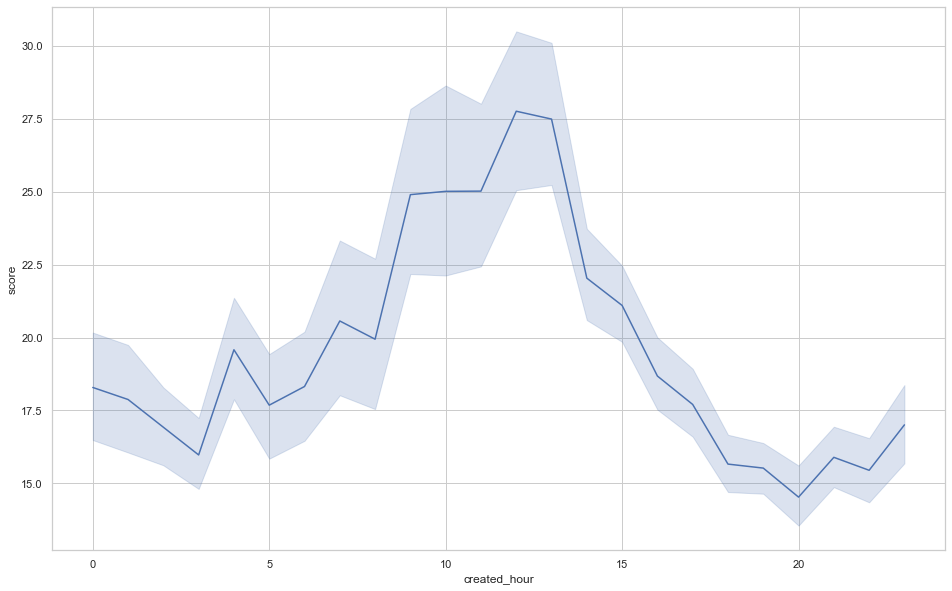

In [105]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_hour", y="score")

# Day vs score on comments

<AxesSubplot:xlabel='created_day', ylabel='score'>

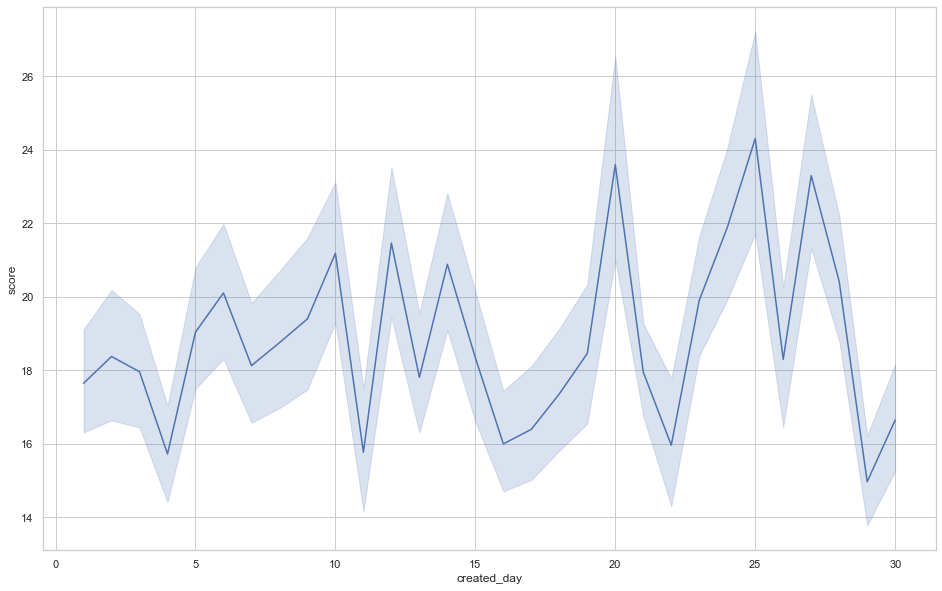

In [106]:
fig = plt.figure(figsize=(16,10))
sns.lineplot(data=df, x="created_day", y="score")

# Which Author have the most scores

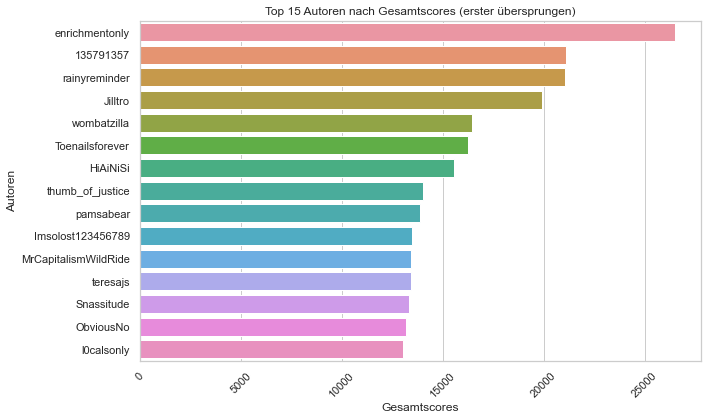

In [107]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Annahme: merged_df ist dein DataFrame mit den entsprechenden Spalten
# Stellen Sie sicher, dass Sie denselben DataFrame-Namen verwenden

# Autoren nach Gesamtscores gruppieren
author_scores = df.groupby('author')['score'].sum()

# Autoren nach Gesamtscores absteigend sortieren
sorted_authors = author_scores.sort_values(ascending=False)

# Den ersten Autor aus der sortierten Liste entfernen
sorted_authors = sorted_authors.iloc[2:]

# Die Top 15 Autoren auswählen
top_authors = sorted_authors.head(15)

# Plot mit Seaborn erstellen
plt.figure(figsize=(10, 6))
sns.barplot(y=top_authors.index, x=top_authors.values)
plt.title('Top 15 Autoren nach Gesamtscores (erster übersprungen)')
plt.xlabel("Gesamtscores")
plt.ylabel("Autoren")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


In [108]:
df.describe()

,author_flair_text,score,controversiality,created_hour,created_day,created_year,comment_len
count,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.0,225213.000000
mean,0.0,18.610080,0.025807,13.263568,15.089142,2016.0,75.938472
std,0.0,76.714045,0.158559,7.152977,8.832397,0.0,82.900619
min,0.0,-549.000000,0.000000,0.000000,1.000000,2016.0,1.000000
25%,0.0,1.000000,0.000000,7.000000,7.000000,2016.0,25.000000
50%,0.0,3.000000,0.000000,15.000000,15.000000,2016.0,51.000000
75%,0.0,11.000000,0.000000,19.000000,22.000000,2016.0,96.000000
max,0.0,4480.000000,1.000000,23.000000,30.000000,2016.0,1988.000000


In [109]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 225213 entries, 0 to 225249
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             225213 non-null  object 
 1   author_flair_text  225213 non-null  int64  
 2   score              225213 non-null  int64  
 3   controversiality   225213 non-null  int64  
 4   stickied           225213 non-null  bool   
 5   link_id            225213 non-null  object 
 6   body               225213 non-null  object 
 7   distinguished      225213 non-null  object 
 8   gilded             225213 non-null  bool   
 9   edited             225213 non-null  bool   
 10  id                 225213 non-null  object 
 11  created_utc        225213 non-null  object 
 12  parent_id          225213 non-null  object 
 13  created_hour       225213 non-null  int64  
 14  created_day        225213 non-null  float64
 15  created_year       225213 non-null  float64
 16  cl

In [110]:
df.describe()

,author_flair_text,score,controversiality,created_hour,created_day,created_year,comment_len
count,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.0,225213.000000
mean,0.0,18.610080,0.025807,13.263568,15.089142,2016.0,75.938472
std,0.0,76.714045,0.158559,7.152977,8.832397,0.0,82.900619
min,0.0,-549.000000,0.000000,0.000000,1.000000,2016.0,1.000000
25%,0.0,1.000000,0.000000,7.000000,7.000000,2016.0,25.000000
50%,0.0,3.000000,0.000000,15.000000,15.000000,2016.0,51.000000
75%,0.0,11.000000,0.000000,19.000000,22.000000,2016.0,96.000000
max,0.0,4480.000000,1.000000,23.000000,30.000000,2016.0,1988.000000


# Save cleaned general data

In [111]:
df.to_csv("relationship_16_comments_EDA_clean.csv",index=False,sep=";")

In [120]:
import pandas as pd
test_author=pd.read_csv("relationship_16_comments_EDA_clean.csv",sep=";")

/Users/anthonyfernando/opt/anaconda3/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3444: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [121]:
test_author.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225213 entries, 0 to 225212
Data columns (total 18 columns):
 #   Column             Non-Null Count   Dtype  
---  ------             --------------   -----  
 0   author             225213 non-null  object 
 1   author_flair_text  225213 non-null  int64  
 2   score              225213 non-null  int64  
 3   controversiality   225213 non-null  int64  
 4   stickied           225213 non-null  bool   
 5   link_id            225213 non-null  object 
 6   body               225213 non-null  object 
 7   distinguished      225213 non-null  object 
 8   gilded             225213 non-null  bool   
 9   edited             225213 non-null  bool   
 10  id                 225213 non-null  object 
 11  created_utc        225213 non-null  object 
 12  parent_id          225213 non-null  object 
 13  created_hour       225213 non-null  int64  
 14  created_day        225213 non-null  float64
 15  created_year       225213 non-null  float64
 16  cl

In [122]:
test_author['gilded'] = test_author['gilded'].replace(False,"0")
test_author['gilded'] = test_author['gilded'].replace(True,"1")

0    225152
1        61
Name: gilded, dtype: int64


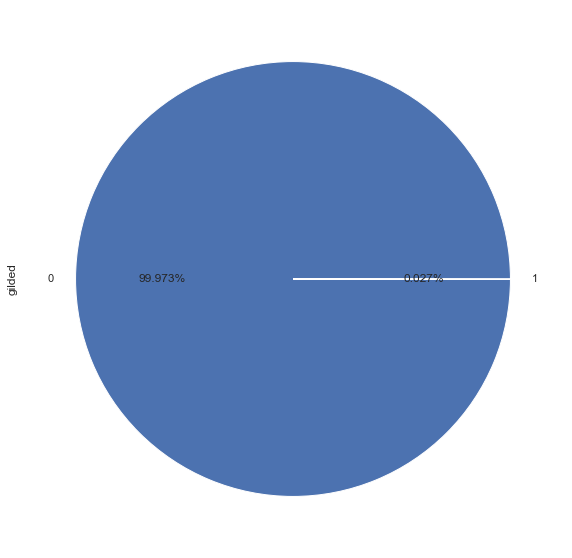

In [123]:
fig = plt.figure(figsize=(16,10))
#plt.rcParams['font.size'] = 18
test_author["gilded"].value_counts().plot(kind='pie', autopct='%1.3f%%')
print(test_author["gilded"].value_counts())

In [125]:
test_author.to_csv("relationship_16_comments_EDA_clean.csv",index=False,sep=";")

In [124]:
test_author.describe()

,author_flair_text,score,controversiality,created_hour,created_day,created_year,comment_len
count,225213.0,225213.000000,225213.000000,225213.000000,225213.000000,225213.0,225213.000000
mean,0.0,18.610080,0.025807,13.263568,15.089142,2016.0,75.938472
std,0.0,76.714045,0.158559,7.152977,8.832397,0.0,82.900619
min,0.0,-549.000000,0.000000,0.000000,1.000000,2016.0,1.000000
25%,0.0,1.000000,0.000000,7.000000,7.000000,2016.0,25.000000
50%,0.0,3.000000,0.000000,15.000000,15.000000,2016.0,51.000000
75%,0.0,11.000000,0.000000,19.000000,22.000000,2016.0,96.000000
max,0.0,4480.000000,1.000000,23.000000,30.000000,2016.0,1988.000000


In [115]:
test_author[test_author['body'] == "."]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len


In [116]:
# Annahme: Sie haben bereits Ihren DataFrame df erstellt oder eingelesen

# Extrahiere alle Zeilen, die mindestens einen NaN-Wert enthalten
df[df.isna().any(axis=1)]

# Jetzt enthält 'rows_with_na' alle Zeilen, die mindestens einen NaN-Wert enthalten


,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len


In [117]:
df[df['author'] == 'Have you heard of a CPAP machine?']

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len


In [289]:
test_author[test_author.isna().any(axis=1)]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year


In [119]:
 test_author[test_author['comment_len'] == 1]

,author,author_flair_text,score,controversiality,stickied,link_id,body,distinguished,gilded,edited,id,created_utc,parent_id,created_hour,created_day,created_year,clean_text,comment_len
305,Shoppingislife_23,0,-7,0,False,t3_5afq1q,Bye,False,False,False,d9g7g3m,2016-11-01 00:55:25,t1_d9g77ht,0,1.0,2016.0,Bye,1
341,Bluemoo10,0,1,0,False,t3_5abtug,thanks!,False,False,False,d9g7ozg,2016-11-01 01:01:08,t1_d9ff8yi,1,1.0,2016.0,thanks,1
1644,ssdreamer1234,0,3,0,False,t3_5ah8j1,Hopefully!,False,False,False,d9ghup8,2016-11-01 05:47:39,t1_d9gfwwe,5,1.0,2016.0,Hopefully,1
1646,Elehhhhna,0,1,0,False,t3_5ae8hx,Mexico,False,False,False,d9ghuv1,2016-11-01 05:47:52,t1_d9gahxc,5,1.0,2016.0,Mexico,1
1975,alpha_28,0,2,0,False,t3_5ahk8i,Ty,False,False,False,d9gjzo6,2016-11-01 07:38:28,t1_d9gjvfu,7,1.0,2016.0,Ty,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
216201,appropriationornah,0,2,0,False,t3_5flkka,Thanks!,False,False,False,dal5tqz,2016-11-29 22:19:09,t1_dal5s7w,22,29.0,2016.0,Thanks,1
216578,roomates04,0,53,0,False,t3_5fkt3s,Thanks!,False,False,False,dal7xzz,2016-11-29 23:03:45,t1_dal0fa9,23,29.0,2016.0,Thanks,1
217019,hatehisfriend,0,3,0,False,t3_5fh2fw,Thanks!,False,False,False,dalakr4,2016-11-30 00:03:29,t1_dal8jyt,0,30.0,2016.0,Thanks,1
217296,LadyLady5678,0,1,0,False,t3_5flxs2,Thanks :),False,False,False,dalciq9,2016-11-30 00:47:50,t1_dal8zv5,0,30.0,2016.0,Thanks,1
